**<u><font color=black, size = 500> The Most </font></u>**
**<u><font color=forestgreen, size = 500>I</font>**</u>
**<u><font color=forestgreen, size = 500>n</font>**</u>
**<u><font color=forestgreen, size = 500>t</font>**</u>
**<u><font color=forestgreen, size = 500>e</font>**</u>
**<u><font color=forestgreen, size = 500>r</font>**</u>
**<u><font color=forestgreen, size = 500>e</font>**</u>
**<u><font color=forestgreen, size = 500>s</font>**</u>
**<u><font color=forestgreen, size = 500>t</font>**</u>
**<u><font color=black, size = 500>ing Code </font>**</u>







# <font color= blue, size = 5> Interest Rate's Effect on Inflation</font>

# <font color= blue, size = 5> Code Authored by Justin Dean</font>

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from datetime import datetime
from pprint import pprint
from scipy.stats import linregress
import scipy.stats as st
import matplotlib.dates as mdates
from config import fred_key

In [2]:
# fred API call for interest rate

fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'FEDFUNDS'
# fred_key= "b89a8705b676607c683445a983e6d21f"
fred_key = fred_key

params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

In [3]:
# Create interest rate dataframe
int_rate_df = pd.DataFrame(fred_response["observations"])

# Reduce to pertinent columns
int_rate_df = int_rate_df[["date", "value"]]

# Convert date to datetime
int_rate_df['date'] = int_rate_df['date'].apply(pd.to_datetime)

# Convert value to float
int_rate_df = int_rate_df.astype({"value": float})

# Change column headers
int_rate_df = int_rate_df.rename(columns={"date": "Date", "value": "Interest Rate"})

# write a CSV
int_rate_df.to_csv("output_data/int_rate.csv")

# Disply values
int_rate_df.head()

,Date,Interest Rate
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [4]:
# API Call for Consumer Price Index (CPI)
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'CPIAUCSL'
fred_key= fred_key

params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"
fred_response = requests.get(query_url, params=params).json()

In [5]:
# CPI Data frame
cpi_df = pd.DataFrame(fred_response["observations"])

# Reduce to pertinent columns
cpi_df = cpi_df[["date", "value"]]

# Convert date to datetime
cpi_df['date'] = cpi_df['date'].apply(pd.to_datetime)

# Convert value to float
cpi_df = cpi_df.astype({"value": float})

# Calculate/create inflation rate column
cpi_df['Inflation Rate'] = cpi_df['value'].pct_change(12)

# Convert inflation rate to %
cpi_df["Inflation Rate"]*=100

# Rename columns
cpi_df = cpi_df.rename(columns={"date": "Date", "value": "CPI"})

# Write To CSV
cpi_df.to_csv("output_data/cpi_rate.csv")

cpi_df.head()

,Date,CPI,Inflation Rate
0,1947-01-01,21.48,NaN
1,1947-02-01,21.62,NaN
2,1947-03-01,22.00,NaN
3,1947-04-01,22.00,NaN
4,1947-05-01,21.95,NaN


In [6]:
# Merge Interest Rate and CPI
mer_int_cpi_df = pd.merge(int_rate_df, cpi_df, on= 'Date')

# Write to CSV
mer_int_cpi_df.to_csv("output_data/merged_int_unemp_gdp_df.csv")

#Display
mer_int_cpi_df.head()

,Date,Interest Rate,CPI,Inflation Rate
0,1954-07-01,0.80,26.86,0.261292
1,1954-08-01,1.22,26.85,0.000000
2,1954-09-01,1.07,26.81,-0.297508
3,1954-10-01,0.85,26.72,-0.853432
4,1954-11-01,0.83,26.78,-0.260708


In [7]:
# Summary Statistics
mer_int_cpi_df[["Interest Rate", "Inflation Rate"]].describe()

,Interest Rate,Inflation Rate
count,822.000000,822.000000
mean,4.595499,3.583110
std,3.618005,2.829087
min,0.050000,-1.958761
25%,1.752500,1.688479
50%,4.110000,2.877084
75%,6.285000,4.437768
max,19.100000,14.592275


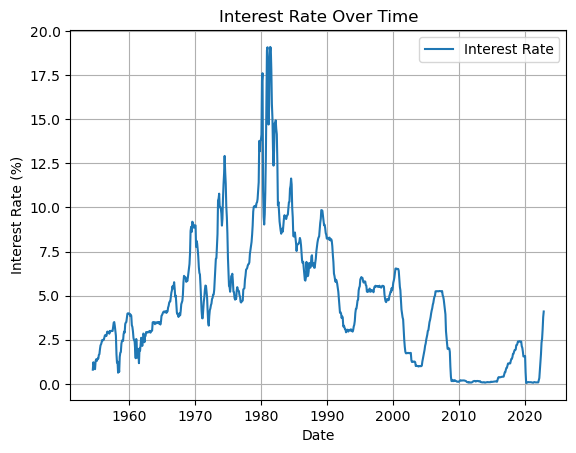

In [8]:
# Create interest rate over time line graph
x_axis = mer_int_cpi_df["Date"]
y_axis = mer_int_cpi_df["Interest Rate"]

# Add titles
plt.title("Interest Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Interest Rate (%)")

# Add gridlines for effect
plt.grid()

# Plot?
plt.plot(x_axis, y_axis)

# Add legend
plt.legend(["Interest Rate"])

# Export to figure
plt.savefig("output_data/interest_over_time.png")

# Display plot
plt.show()

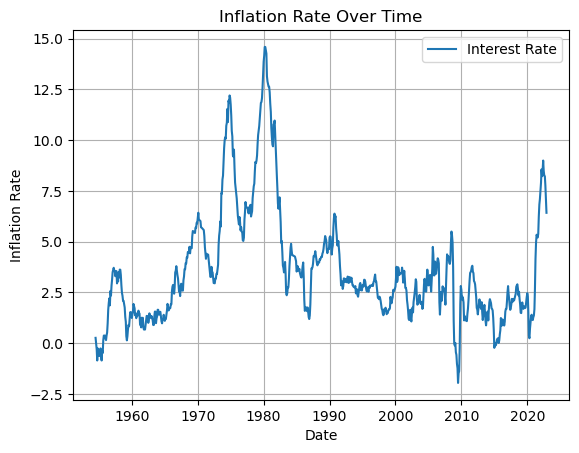

In [9]:
# Create interest rate over time line graph
x_axis = mer_int_cpi_df["Date"]
y_axis = mer_int_cpi_df["Inflation Rate"]

# Add titles
plt.title("Inflation Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Inflation Rate")

# Add gridlines for effect
plt.grid()

# Plot?
plt.plot(x_axis, y_axis)

# Change line color
plt.plot(color = "orange")

# Add legend
plt.legend(["Interest Rate"])

# Save the figure
plt.savefig("output_data/inflation_over_time.png")

plt.show()

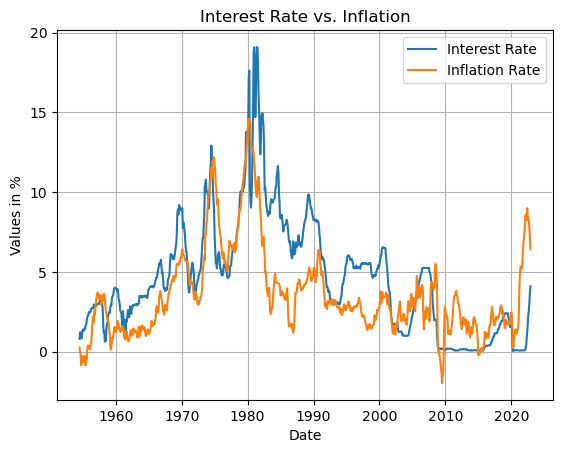

In [10]:
# Create Interest rate vs inflation rate line graph
x_axis = mer_int_cpi_df["Date"]
y_axis = mer_int_cpi_df["Interest Rate"]
y2_axis = mer_int_cpi_df["Inflation Rate"]

# Add titles
plt.title("Interest Rate vs. Inflation")
plt.xlabel("Date")
plt.ylabel("Values in %")

# Add gridlines for effect
plt.grid()

# Plot
plt.plot(x_axis, y_axis)
plt.plot(x_axis, y2_axis)
plt.legend(["Interest Rate", "Inflation Rate"])

# Save the figure
plt.savefig("output_data/interest_vs_inflation_line.png")

plt.show()

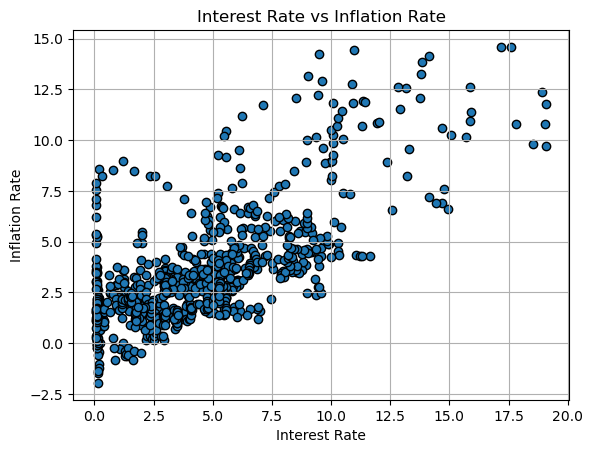

In [11]:
# Build the scatter plots interest rate vs inflation rate
y_values = mer_int_cpi_df["Inflation Rate"]
x_values = mer_int_cpi_df["Interest Rate"]

# Do some formating for effect
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")

# Add titles
plt.title('Interest Rate vs Inflation Rate')
plt.ylabel("Inflation Rate")
plt.xlabel("Interest Rate")

# Add gridlines for effect
plt.grid()

# Save the figure
plt.savefig("output_data/interest_vs_inflation_scatter.png")

# Show plot
plt.show()

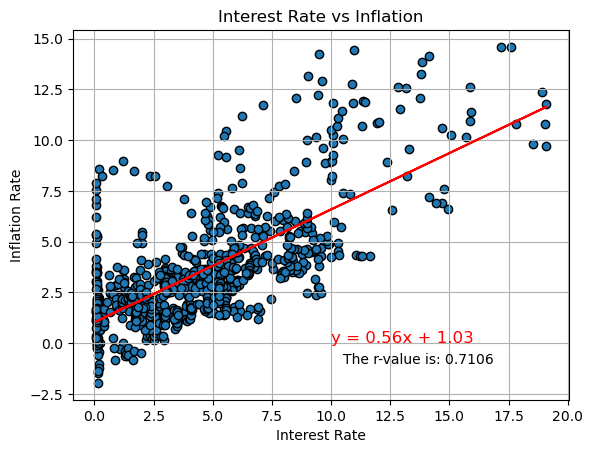

In [12]:
# Interest rate vs inflation linear regression

# Set variable
interest_rate = mer_int_cpi_df['Interest Rate']
inflation_rate = mer_int_cpi_df['Inflation Rate']

# Build the plot
x_values = interest_rate
y_values = inflation_rate

#Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Formating for effect
plt.scatter(x_values,y_values,linewidth=1, marker="o", edgecolors="black")

# Plot Regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=12,color="red")

# Add some titles
plt.title(label="Interest Rate vs Inflation")
plt.xlabel('Interest Rate')
plt.ylabel('Inflation Rate')

# Text to show r-value
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(10.5,-1,text)


# Add gridlines for effect
plt.grid()

# save the figure as an .svg 
plt.savefig("output_data/interest_vs_inflation_regression.png")

# Show plot
plt.show()

# <font color=blue, size = 5> Interest Rate's Relation to GDP</font>

# <font color= blue, size = 5> Code Authored by Michelle Owino</font>

### GDP DATA (for recession) 

In [13]:
# Set the API base URL and parameters
url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'GDP'
fred_key = fred_key

params = {"series_id": fred_series_id,"apiKey": fred_key}

# Build query URL
query_url = f"{url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

# Get FRED GDP data 
gdp_response = requests.get(query_url, params=params).json()


In [14]:
# Create a data frame for GDP and years
gdp_data = pd.DataFrame(gdp_response["observations"])
gdp_data = gdp_data[["date", "value"]]

gdp_data= gdp_data[gdp_data["value"] != "."]

gdp_data["date"] = gdp_data["date"].apply(pd.to_datetime)
gdp_data = gdp_data.astype({"value": float})

gdp_data.head()

,date,value
4,1947-01-01,243.164
5,1947-04-01,245.968
6,1947-07-01,249.585
7,1947-10-01,259.745
8,1948-01-01,265.742


In [15]:
# Convert the date column to datetime objects
gdp_data['date'] = pd.to_datetime(gdp_data['date'], format='%Y-%m-%d')
    
# Set the date column as the index of the dataframe
gdp_data = gdp_data.set_index('date')



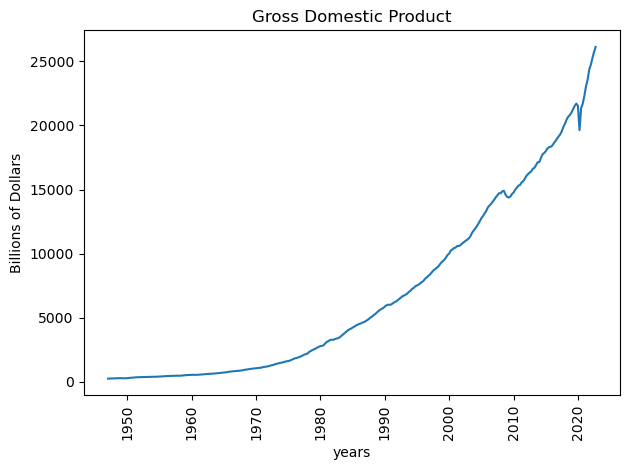

In [16]:
# Generate a line plot for GDP and years
plt.plot(gdp_data.index, gdp_data['value'])

# Incorporate the other graph properties
plt.title("Gross Domestic Product")
plt.ylabel("Billions of Dollars")
plt.xlabel("years")
plt.xticks(rotation="90")
plt.tight_layout()

# Show plot
plt.show()

### Interest Rates

In [17]:
# Set the API base URL and parameters
url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'FEDFUNDS'
fred_key = fred_key
params = {"series_id": fred_series_id,"apiKey": fred_key}

# Build query URL
query_url = f"{url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

# Get FRED GDP data 
int_response = requests.get(query_url, params=params).json()


In [18]:
# Create a data frame for interest rate and years
int_data = pd.DataFrame(int_response["observations"])
int_data = int_data[["date", "value"]]

int_data.dropna(inplace=True)

int_data["date"] = int_data["date"].apply(pd.to_datetime)
int_data = int_data.astype({"value": float})

# Convert the date column to datetime objects
int_data['date'] = pd.to_datetime(int_data['date'], format='%Y-%m-%d')
    
# Set the date column as the index of the dataframe
int_data = int_data.set_index('date')


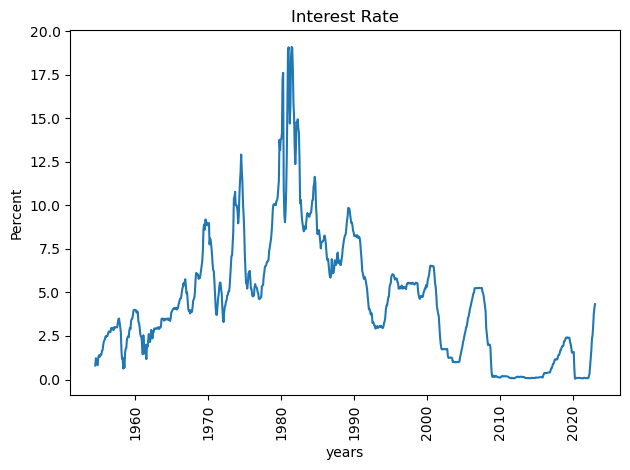

In [19]:
# Generate a line plot for interest rate and years
plt.plot(int_data.index, int_data['value'])

# Incorporate the other graph properties
plt.title("Interest Rate")
plt.ylabel("Percent")
plt.xlabel("years")
plt.xticks(rotation="90")
plt.tight_layout()

# Show plot
plt.show()

In [20]:
#Merge GDP and interest rates DF
merged_df = pd.merge(gdp_data, int_data, on='date')

int_data.dropna(inplace=True)

merged_df

,value_x,value_y
date,,
1954-07-01,390.996,0.80
1954-10-01,399.734,0.85
1955-01-01,413.073,1.39
1955-04-01,421.532,1.43
1955-07-01,430.221,1.68
...,...,...
2021-10-01,24349.121,0.08
2022-01-01,24740.480,0.08
2022-04-01,25248.476,0.33


In [21]:
gdp1k = merged_df.value_x.map(lambda x: x/1000)

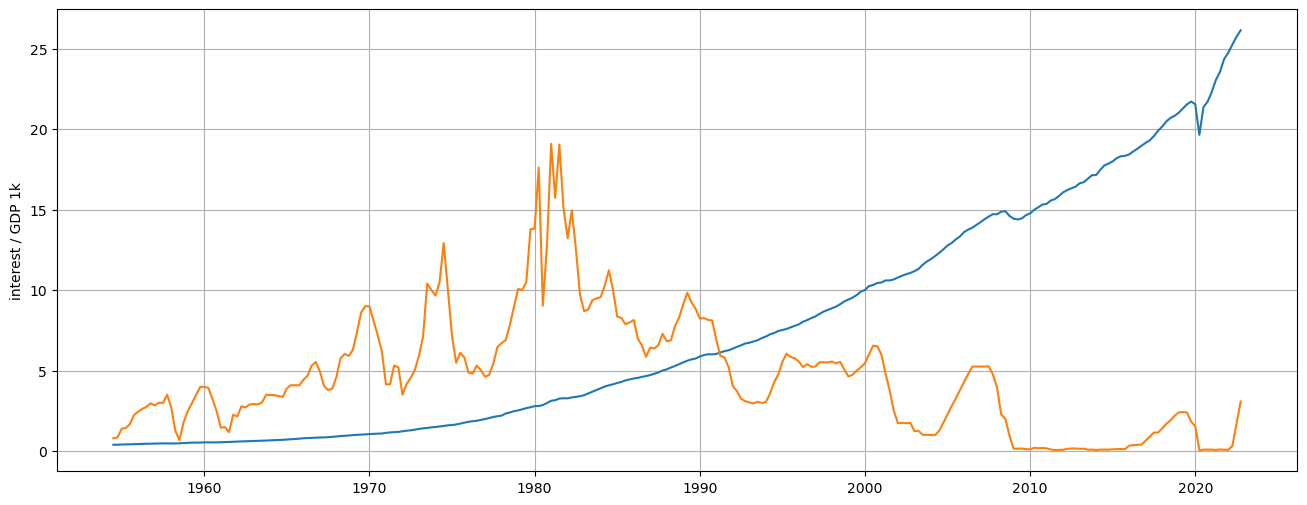

In [22]:

plt.figure(figsize=[16,6])
plt.grid()
plt.ylabel('interest / GDP 1k')
plt.plot(merged_df.index,gdp1k)
plt.plot(merged_df.index,merged_df.value_y)

The r-value is: 0.26


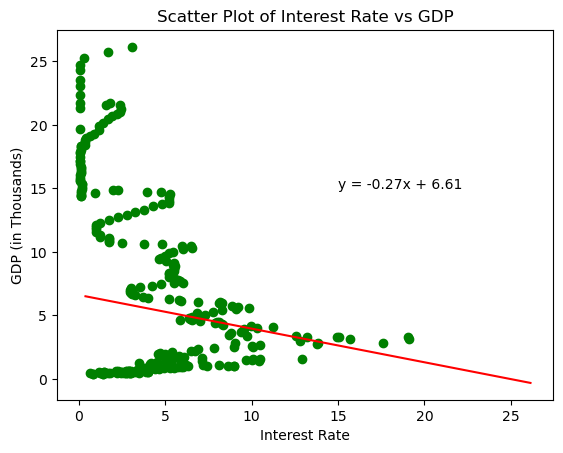

In [23]:
# Set x and y values
gdp1k = merged_df.value_x.map(lambda x: x/1000)
interest_rate = merged_df.value_y

# Calculate the regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(gdp1k, interest_rate)
regress_values = gdp1k * slope + intercept 
line_eq = 'y = '+ str(round(slope, 2)) + 'x + ' + str(round(intercept,2))

#Generate scatter chat
plt.scatter(interest_rate, gdp1k, marker = "o", facecolor="green")

# Plot line 
plt.plot(gdp1k, regress_values, 'r')
plt.annotate(line_eq,(15,15))

# Define X and y values
plt.xlabel("Interest Rate")
plt.ylabel("GDP (in Thousands)")
plt.title("Scatter Plot of Interest Rate vs GDP")

# Print r-squared value
print(f"The r-value is: {round(rvalue**2,2)}")


# <font color=blue, size = 5> Can we Predict the Next Recession?</font>

# <font color= blue, size = 5> Code Authored by Armann Andaya</font>

### Interest Rate Dataframe

In [24]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'FEDFUNDS'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

int_rate_df = pd.DataFrame(fred_response["observations"])

# Reduce to pertinent columns
int_rate_df = int_rate_df[["date", "value"]]

# Change column header on value column
int_rate_df.columns.values[1] = "Interest Rate"

# write a CSV
int_rate_df.to_csv("output_data/int_rate.csv")

# Change the data types 
int_rate_df['date'] = int_rate_df['date'].apply(pd.to_datetime)
int_rate_df = int_rate_df.astype({"Interest Rate": float})

# print the dataframe
int_rate_df



,date,Interest Rate
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
818,2022-09-01,2.56
819,2022-10-01,3.08
820,2022-11-01,3.78
821,2022-12-01,4.10


### Unemployment Rate Dataframe

In [25]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'UNRATE'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"
fred_response = requests.get(query_url, params=params).json()

unemp_df = pd.DataFrame(fred_response["observations"])
# Reduce to pertinent columns
unemp_df = unemp_df[["date", "value"]]

# Change column header on value column
unemp_df.columns.values[1] = "Unemployment Rate"

# write a CSV
unemp_df.to_csv("output_data/unemp.csv")

# Change the data types 
unemp_df['date'] = unemp_df['date'].apply(pd.to_datetime)
unemp_df = unemp_df.astype({"Unemployment Rate": float})

unemp_df





,date,Unemployment Rate
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
896,2022-09-01,3.5
897,2022-10-01,3.7
898,2022-11-01,3.6
899,2022-12-01,3.5


### GDP Dataframe

In [26]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'GDP'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"
fred_response = requests.get(query_url, params=params).json()

gdp_df = pd.DataFrame(fred_response["observations"])

# Reduce to pertinent columns
gdp_df = gdp_df[["date", "value"]]

# Change column header on value column
gdp_df.columns.values[1] = "GDP"

#___________________________________________________________
# Remove null values (values labeled as '.')
gdp_df = gdp_df.loc[gdp_df["GDP"] != '.']
#___________________________________________________________

# Change the data types 
gdp_df['date'] = gdp_df['date'].apply(pd.to_datetime)
gdp_df = gdp_df.astype({"GDP": float})


# write a CSV
gdp_df.to_csv("output_data/gdp_rate.csv")
gdp_df




,date,GDP
4,1947-01-01,243.164
5,1947-04-01,245.968
6,1947-07-01,249.585
7,1947-10-01,259.745
8,1948-01-01,265.742
...,...,...
303,2021-10-01,24349.121
304,2022-01-01,24740.480
305,2022-04-01,25248.476
306,2022-07-01,25723.941


### Real Personal Income Dataframe

In [27]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'RPI'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

rpi_df = pd.DataFrame(fred_response["observations"])

# Reduce to pertinent columns
rpi_df = rpi_df[["date", "value"]]

# Change column header on value column
rpi_df.columns.values[1] = "Real Personal Income"

# write a CSV
rpi_df.to_csv("output_data/rpi.csv")

# Change the data types 
rpi_df['date'] = rpi_df['date'].apply(pd.to_datetime)
rpi_df = rpi_df.astype({"Real Personal Income": float})

rpi_df


,date,Real Personal Income
0,1959-01-01,2442.158
1,1959-02-01,2451.778
2,1959-03-01,2467.594
3,1959-04-01,2483.671
4,1959-05-01,2498.026
...,...,...
763,2022-08-01,17667.669
764,2022-09-01,17673.729
765,2022-10-01,17748.128
766,2022-11-01,17776.251


### Industrial Production Dataframe

In [28]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'INDPRO'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

indpro_df = pd.DataFrame(fred_response["observations"])

# Reduce to pertinent columns
indpro_df = indpro_df[["date", "value"]]

# Change column header on value column
indpro_df.columns.values[1] = "Industrial Production Index"

# Change the data types 
indpro_df['date'] = indpro_df['date'].apply(pd.to_datetime)
indpro_df = indpro_df.astype({"Industrial Production Index": float})


# write a CSV
indpro_df.to_csv("output_data/indpro.csv")
indpro_df


,date,Industrial Production Index
0,1919-01-01,4.8773
1,1919-02-01,4.6617
2,1919-03-01,4.5270
3,1919-04-01,4.6078
4,1919-05-01,4.6348
...,...,...
1243,2022-08-01,104.4696
1244,2022-09-01,104.8292
1245,2022-10-01,104.7972
1246,2022-11-01,104.1863


### Real Personal Consumption Dataframe

In [29]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'PCEC96'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

rpc_df = pd.DataFrame(fred_response["observations"])

# Reduce to pertinent columns
rpc_df = rpc_df[["date", "value"]]

# Change column header on value column
rpc_df.columns.values[1] = "Real Personal Consumption"

#___________________________________________________________
# Remove null values (values labeled as '.')
rpc_df = rpc_df.loc[rpc_df["Real Personal Consumption"] != '.']
#___________________________________________________________


# Change the data types 
rpc_df['date'] = rpc_df['date'].apply(pd.to_datetime)
rpc_df = rpc_df.astype({"Real Personal Consumption": float})


# write a CSV
rpc_df.to_csv("output_data/rpc.csv")
rpc_df

,date,Real Personal Consumption
516,2002-01-01,9004.4
517,2002-02-01,9040.1
518,2002-03-01,9038.2
519,2002-04-01,9086.5
520,2002-05-01,9051.4
...,...,...
763,2022-08-01,14188.9
764,2022-09-01,14225.6
765,2022-10-01,14285.3
766,2022-11-01,14256.0


### Women Employment Level Dataframe

In [30]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'LNS12000002'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

wel_df = pd.DataFrame(fred_response["observations"])

wel_df.drop(wel_df.columns[[0, 1]], axis=1, inplace=True)

# Change column header on value column
wel_df.columns.values[1] = "Women Employment Level"

# Change the data types 
wel_df['date'] = wel_df['date'].apply(pd.to_datetime)
wel_df = wel_df.astype({"Women Employment Level": float})


# write a CSV
wel_df.to_csv("output_data/wel.csv")
wel_df


,date,Women Employment Level
0,1948-01-01,16325.0
1,1948-02-01,16361.0
2,1948-03-01,16240.0
3,1948-04-01,16706.0
4,1948-05-01,16344.0
...,...,...
896,2022-09-01,74318.0
897,2022-10-01,74033.0
898,2022-11-01,73970.0
899,2022-12-01,74364.0


### Total Nonfarm Workers

In [31]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'PAYEMS'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

tnw_df = pd.DataFrame(fred_response["observations"])

tnw_df.drop(tnw_df.columns[[0, 1]], axis=1, inplace=True)

# Change column header on value column
tnw_df.columns.values[1] = "Total Nonfarm Workers"

# Change the data types 
tnw_df['date'] = tnw_df['date'].apply(pd.to_datetime)
tnw_df = tnw_df.astype({"Total Nonfarm Workers": float})


# # write a CSV
tnw_df.to_csv("output_data/tnw.csv")
tnw_df


,date,Total Nonfarm Workers
0,1939-01-01,29923.0
1,1939-02-01,30100.0
2,1939-03-01,30280.0
3,1939-04-01,30094.0
4,1939-05-01,30299.0
...,...,...
1004,2022-09-01,153682.0
1005,2022-10-01,154006.0
1006,2022-11-01,154296.0
1007,2022-12-01,154556.0


### Retail Sales Dataframe

In [32]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'MRTSSM44X72USS'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

rs_df = pd.DataFrame(fred_response["observations"])

rs_df.drop(rs_df.columns[[0, 1]], axis=1, inplace=True)

# Change column header on value column
rs_df.columns.values[1] = "Retail Sales"

# Change the data types 
rs_df['date'] = rs_df['date'].apply(pd.to_datetime)
rs_df = rs_df.astype({"Retail Sales": float})


# # write a CSV
rs_df.to_csv("output_data/rs.csv")
rs_df

,date,Retail Sales
0,1992-01-01,164095.0
1,1992-02-01,164213.0
2,1992-03-01,163721.0
3,1992-04-01,164709.0
4,1992-05-01,165612.0
...,...,...
366,2022-07-01,681108.0
367,2022-08-01,685685.0
368,2022-09-01,684538.0
369,2022-10-01,691844.0


### Manufacturing Dataframe

In [33]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'MANEMP'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

manf_df = pd.DataFrame(fred_response["observations"])

manf_df.drop(manf_df.columns[[0, 1]], axis=1, inplace=True)

# Change column header on value column
manf_df.columns.values[1] = "Manufacturing"

# Change the data types 
manf_df['date'] = manf_df['date'].apply(pd.to_datetime)
manf_df = manf_df.astype({"Manufacturing": float})


# # write a CSV
manf_df.to_csv("output_data/manf.csv")
manf_df

,date,Manufacturing
0,1939-01-01,9077.0
1,1939-02-01,9175.0
2,1939-03-01,9275.0
3,1939-04-01,9309.0
4,1939-05-01,9299.0
...,...,...
1004,2022-09-01,12917.0
1005,2022-10-01,12954.0
1006,2022-11-01,12968.0
1007,2022-12-01,12980.0


### All merged dataframes with GDP

In [34]:
# Merging dataframes with GDP (int_rate_df, unemp_df, rpc_df, rpi_df, indpro_df, wel_df, tnw_df, rs_df, manf_df)

merged_gdp_int_rate_df = pd.merge(gdp_df, int_rate_df, on='date')
merged_gdp_unemp_df = pd.merge(gdp_df, unemp_df, on='date')
merged_gdp_rpc_df = pd.merge(gdp_df, rpc_df, on='date')
merged_gdp_rpi_df = pd.merge(gdp_df, rpi_df, on='date')
merged_gdp_indpro_df = pd.merge(gdp_df, indpro_df, on='date')
merged_gdp_wel_df = pd.merge(gdp_df, wel_df, on='date')
merged_gdp_tnw_df = pd.merge(gdp_df, tnw_df, on='date')
merged_gdp_rs_df = pd.merge(gdp_df, rs_df, on='date')
merged_gdp_manf_df = pd.merge(gdp_df, manf_df, on='date')



### GDP vs Interest Rate - Linear Regression

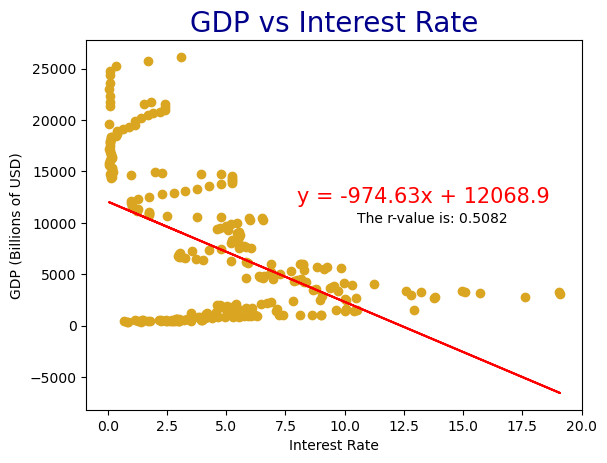

In [35]:
# Linear regression on GDP vs Interest Rate
int_rate = merged_gdp_int_rate_df['Interest Rate']
gdp = merged_gdp_int_rate_df['GDP']
x_values = int_rate
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,12000),fontsize=15,color="red")
plt.xlabel('Interest Rate')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(10.5,10000,text)
plt.title(label="GDP vs Interest Rate",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_int_rate_plot.svg')


plt.show()

# assign variable to r value for this plot
r_val_gdp_int_rate = abs(round(st.pearsonr(x_values,y_values)[0],4))

### GDP vs Unemployment Rate - Linear Regression

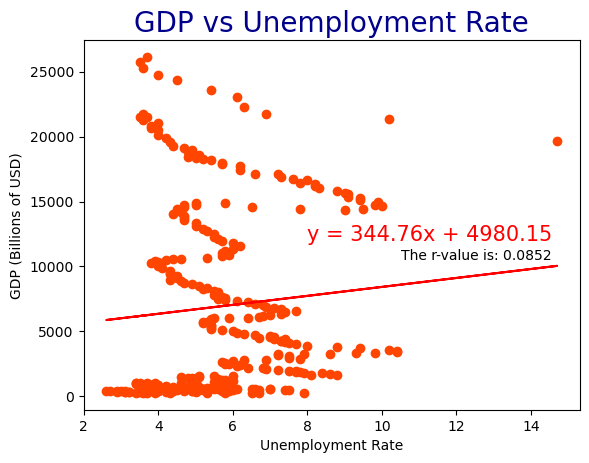

In [36]:
# Linear regression on GDP vs Unemployment Rate
unemp_rate = merged_gdp_unemp_df['Unemployment Rate']
gdp = merged_gdp_unemp_df['GDP']
x_values = unemp_rate
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='orangered')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,12000),fontsize=15,color="red")
plt.xlabel('Unemployment Rate')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(10.5,10500,text)
plt.title(label="GDP vs Unemployment Rate",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_unemp_plot.svg')


plt.show()

# assign variable to r value for this plot
r_val_gdp_unemp = abs(round(st.pearsonr(x_values,y_values)[0],4))

### GDP vs Real Personal Consumption -  Linear Regression

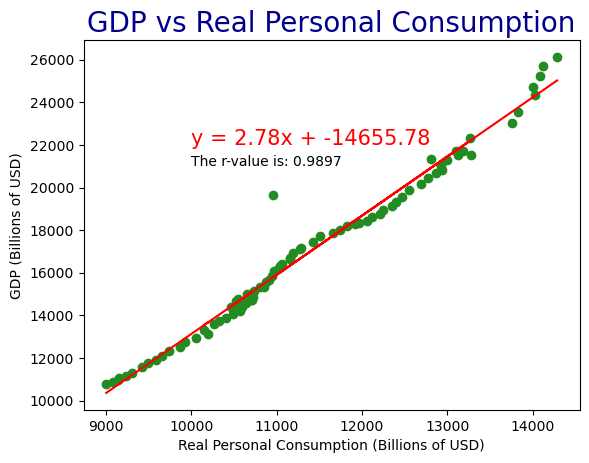

In [37]:
# Linear regression on GDP vs Real Personal Consumption
rpc = merged_gdp_rpc_df['Real Personal Consumption']
gdp = merged_gdp_rpc_df['GDP']
x_values = rpc
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='forestgreen')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10000,22000),fontsize=15,color="red")
plt.xlabel('Real Personal Consumption (Billions of USD)')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(10000,21000,text)
plt.title(label="GDP vs Real Personal Consumption",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_rpc_plot.svg')


plt.show()

# assign variable to r value for this plot
r_val_gdp_rpc = abs(round(st.pearsonr(x_values,y_values)[0],4))

### GDP vs Women Employment Level - Linear Regression

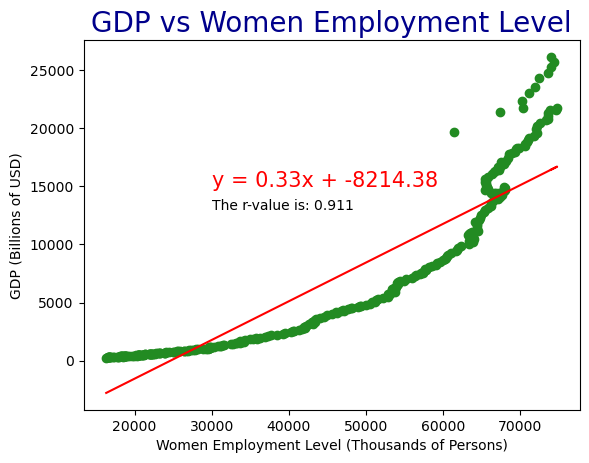

In [38]:
# Linear regression on GDP vs Real Personal Consumption
wel = merged_gdp_wel_df['Women Employment Level']
gdp = merged_gdp_wel_df['GDP']
x_values = wel
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='forestgreen')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30000,15000),fontsize=15,color="red")
plt.xlabel('Women Employment Level (Thousands of Persons)')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(30000,13000,text)
plt.title(label="GDP vs Women Employment Level",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_wel_plot.svg')


plt.show()

r_val_gdp_wel = abs(round(st.pearsonr(x_values,y_values)[0],4))

### GDP vs Real Personal Income - Linear Regression

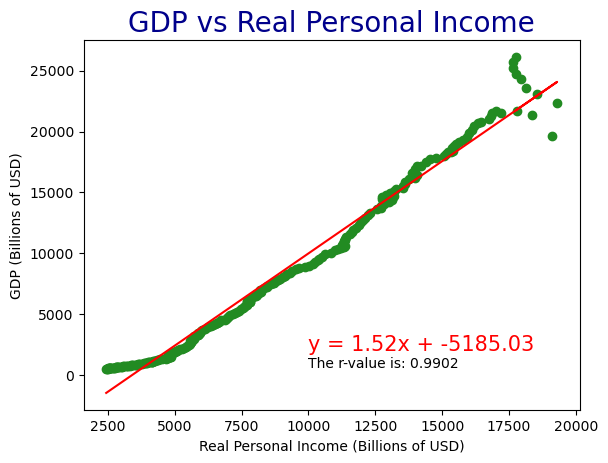

In [39]:
# Linear regression on GDP vs Real Personal Consumption
rpi = merged_gdp_rpi_df['Real Personal Income']
gdp = merged_gdp_rpi_df['GDP']
x_values = rpi
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='forestgreen')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10000,2000),fontsize=15,color="red")
plt.xlabel('Real Personal Income (Billions of USD)')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(10000,600,text)
plt.title(label="GDP vs Real Personal Income",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_rpi_plot.svg')


plt.show()

r_val_gdp_rpi = abs(round(st.pearsonr(x_values,y_values)[0],4))

### GDP vs. Industrial Production - Linear Regression

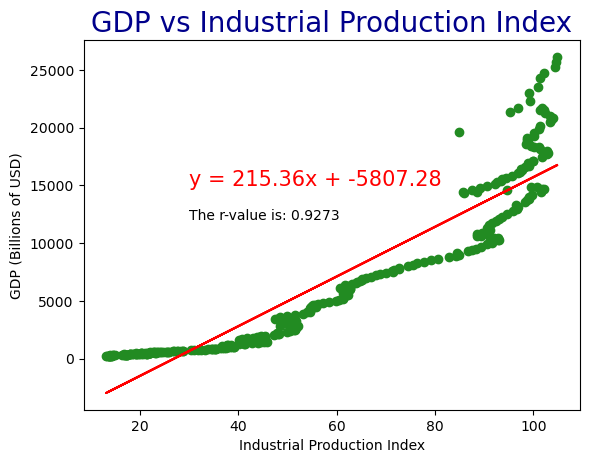

In [40]:
# Linear regression on GDP vs Industrial Production
indpro = merged_gdp_indpro_df['Industrial Production Index']
gdp = merged_gdp_indpro_df['GDP']
x_values = indpro
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='forestgreen')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,15000),fontsize=15,color="red")
plt.xlabel('Industrial Production Index')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(30,12000,text)
plt.title(label="GDP vs Industrial Production Index",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_indpro_plot.svg')


plt.show()

r_val_gdp_indpro = abs(round(st.pearsonr(x_values,y_values)[0],4))

### GDP vs Total Nonfarm Workers - Linear Regression

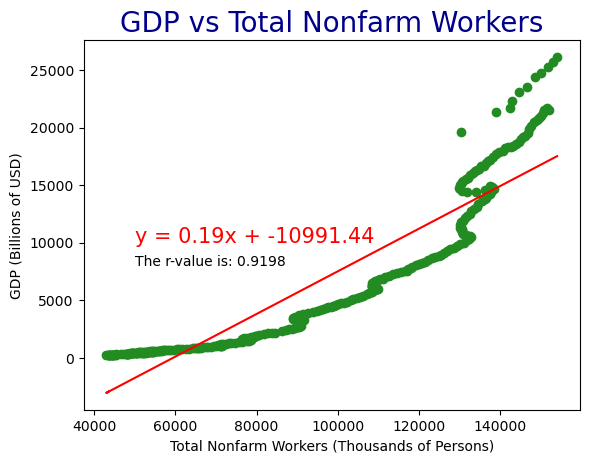

In [41]:
# Linear regression on GDP vs Total Nonfarm Workers
tnw = merged_gdp_tnw_df['Total Nonfarm Workers']
gdp = merged_gdp_tnw_df['GDP']
x_values = tnw
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='forestgreen')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50000,10000),fontsize=15,color="red")
plt.xlabel('Total Nonfarm Workers (Thousands of Persons)')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(50000,8000,text)
plt.title(label="GDP vs Total Nonfarm Workers",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_tnw_plot.svg')


plt.show()

r_val_gdp_tnw = abs(round(st.pearsonr(x_values,y_values)[0],4))

### GDP vs Retail Sales - Linear Regression

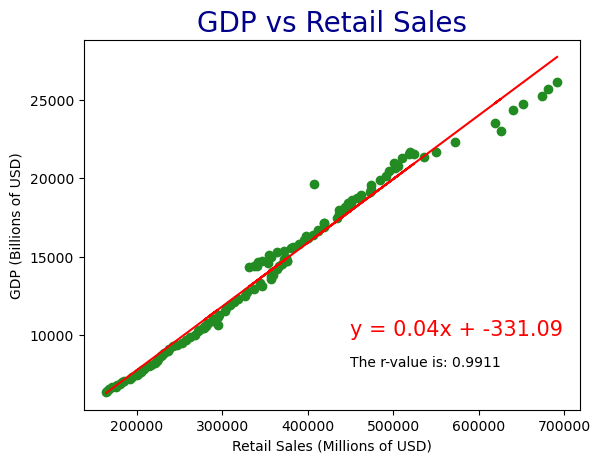

In [42]:
# Linear regression on GDP vs Retail Sales
rs = merged_gdp_rs_df['Retail Sales']
gdp = merged_gdp_rs_df['GDP']
x_values = rs
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='forestgreen')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(450000,10000),fontsize=15,color="red")
plt.xlabel('Retail Sales (Millions of USD)')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(450000,8000,text)
plt.title(label="GDP vs Retail Sales",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_rs_plot.svg')


plt.show()

r_val_gdp_rs = abs(round(st.pearsonr(x_values,y_values)[0],4))

### GDP vs Manufacturing - Linear Regression

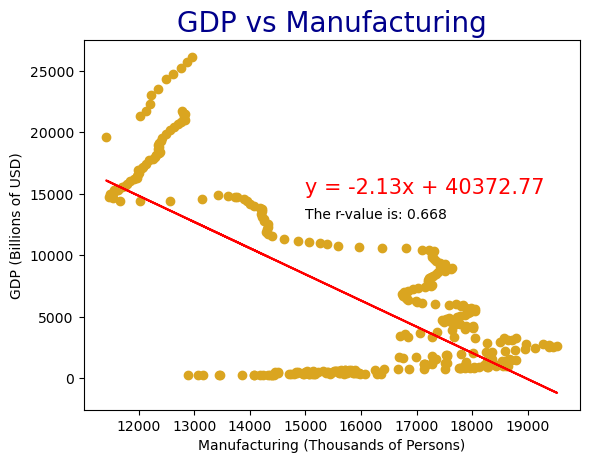

In [43]:
# Linear regression on GDP vs Manufacturing
manf = merged_gdp_manf_df['Manufacturing']
gdp = merged_gdp_manf_df['GDP']
x_values = manf
y_values = gdp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, c='goldenrod')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15000,15000),fontsize=15,color="red")
plt.xlabel('Manufacturing (Thousands of Persons)')
plt.ylabel('GDP (Billions of USD)')
text = (f"The r-value is: {abs(round(st.pearsonr(x_values,y_values)[0],4))}")
plt.text(15000,13000,text)
plt.title(label="GDP vs Manufacturing",
          fontsize=20,
          color="darkblue")

# save the figure as an .svg 
plt.savefig('gdp_vs_manf_plot.svg')


# plt.show()
r_val_gdp_manf = abs(round(st.pearsonr(x_values,y_values)[0],4))

### R Value Dataframe

In [44]:
relation = ['GDP vs Interest Rate', 'GDP vs Unemployment Rate', 'GDP vs Real Personal Consumption',
            'GDP vs Real Personal Income', 'GDP vs Industrial Production', 'GDP vs Women Employment Level',
            'GDP vs Total Nonfarm Workers', 'GDP vs Retail Sales', 'GDP vs Manufacturing']
  
r_value = [r_val_gdp_int_rate, r_val_gdp_unemp, r_val_gdp_rpc, r_val_gdp_rpi, r_val_gdp_indpro,
           r_val_gdp_wel, r_val_gdp_tnw, r_val_gdp_rs, r_val_gdp_manf]
  
# Merge using Zip
r_value_list = list(zip(relation, r_value))
  
# Create the DataFrame
r_value_dfs = pd.DataFrame(r_value_list, columns=['Relation', 'R Values'])

# Sort the DataFrame from Highest to Lowest
r_values_sort_dfs = r_value_dfs.sort_values(by=['R Values'], ascending=False)
r_values_sort_dfs



,Relation,R Values
7,GDP vs Retail Sales,0.9911
3,GDP vs Real Personal Income,0.9902
2,GDP vs Real Personal Consumption,0.9897
4,GDP vs Industrial Production,0.9273
6,GDP vs Total Nonfarm Workers,0.9198
5,GDP vs Women Employment Level,0.9110
8,GDP vs Manufacturing,0.6680
0,GDP vs Interest Rate,0.5082
1,GDP vs Unemployment Rate,0.0852


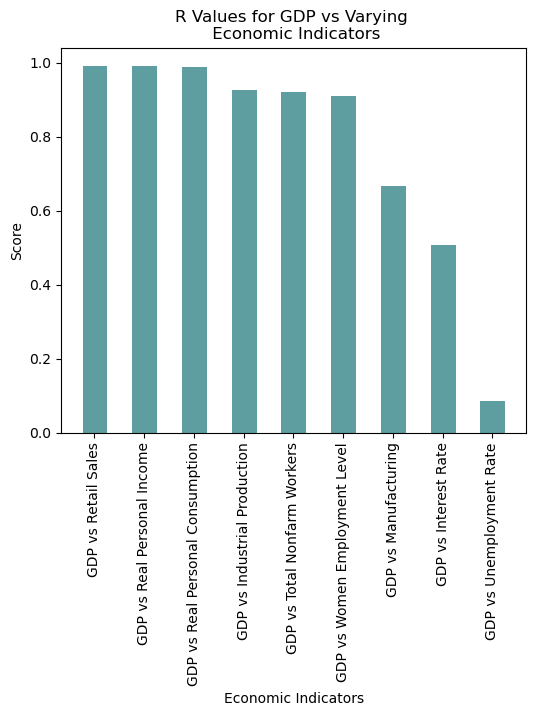

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(r_values_sort_dfs))
tick_locations = [value-.01 for value in x_axis]
plt.figure(figsize= (6,5))
plt.bar(x_axis, r_values_sort_dfs["R Values"], color='cadetblue', width = 0.5, align = 'center')
plt.xticks(tick_locations, r_values_sort_dfs["Relation"], rotation="90")
plt.title("R Values for GDP vs Varying \n Economic Indicators")
plt.xlabel("Economic Indicators")
plt.ylabel("Score")

# save the figure as an .svg 
plt.savefig('rvalues_plot.svg')


plt.show()

### GDP, RPI, and Interest Rate Dataframe

In [46]:
merged_gdp_rpi_int_rate_df = pd.merge(pd.merge(int_rate_df, gdp_df, on='date'), rpi_df , on='date')
merged_gdp_rpi_int_rate_df

,date,Interest Rate,GDP,Real Personal Income
0,1959-01-01,2.48,510.330,2442.158
1,1959-04-01,2.96,522.653,2483.671
2,1959-07-01,3.47,525.034,2504.312
3,1959-10-01,3.98,528.600,2495.225
4,1960-01-01,3.99,542.648,2548.137
...,...,...,...,...
251,2021-10-01,0.08,24349.121,17937.674
252,2022-01-01,0.08,24740.480,17749.994
253,2022-04-01,0.33,25248.476,17664.987
254,2022-07-01,1.68,25723.941,17651.739


### Create Three Charts on a Single Plot

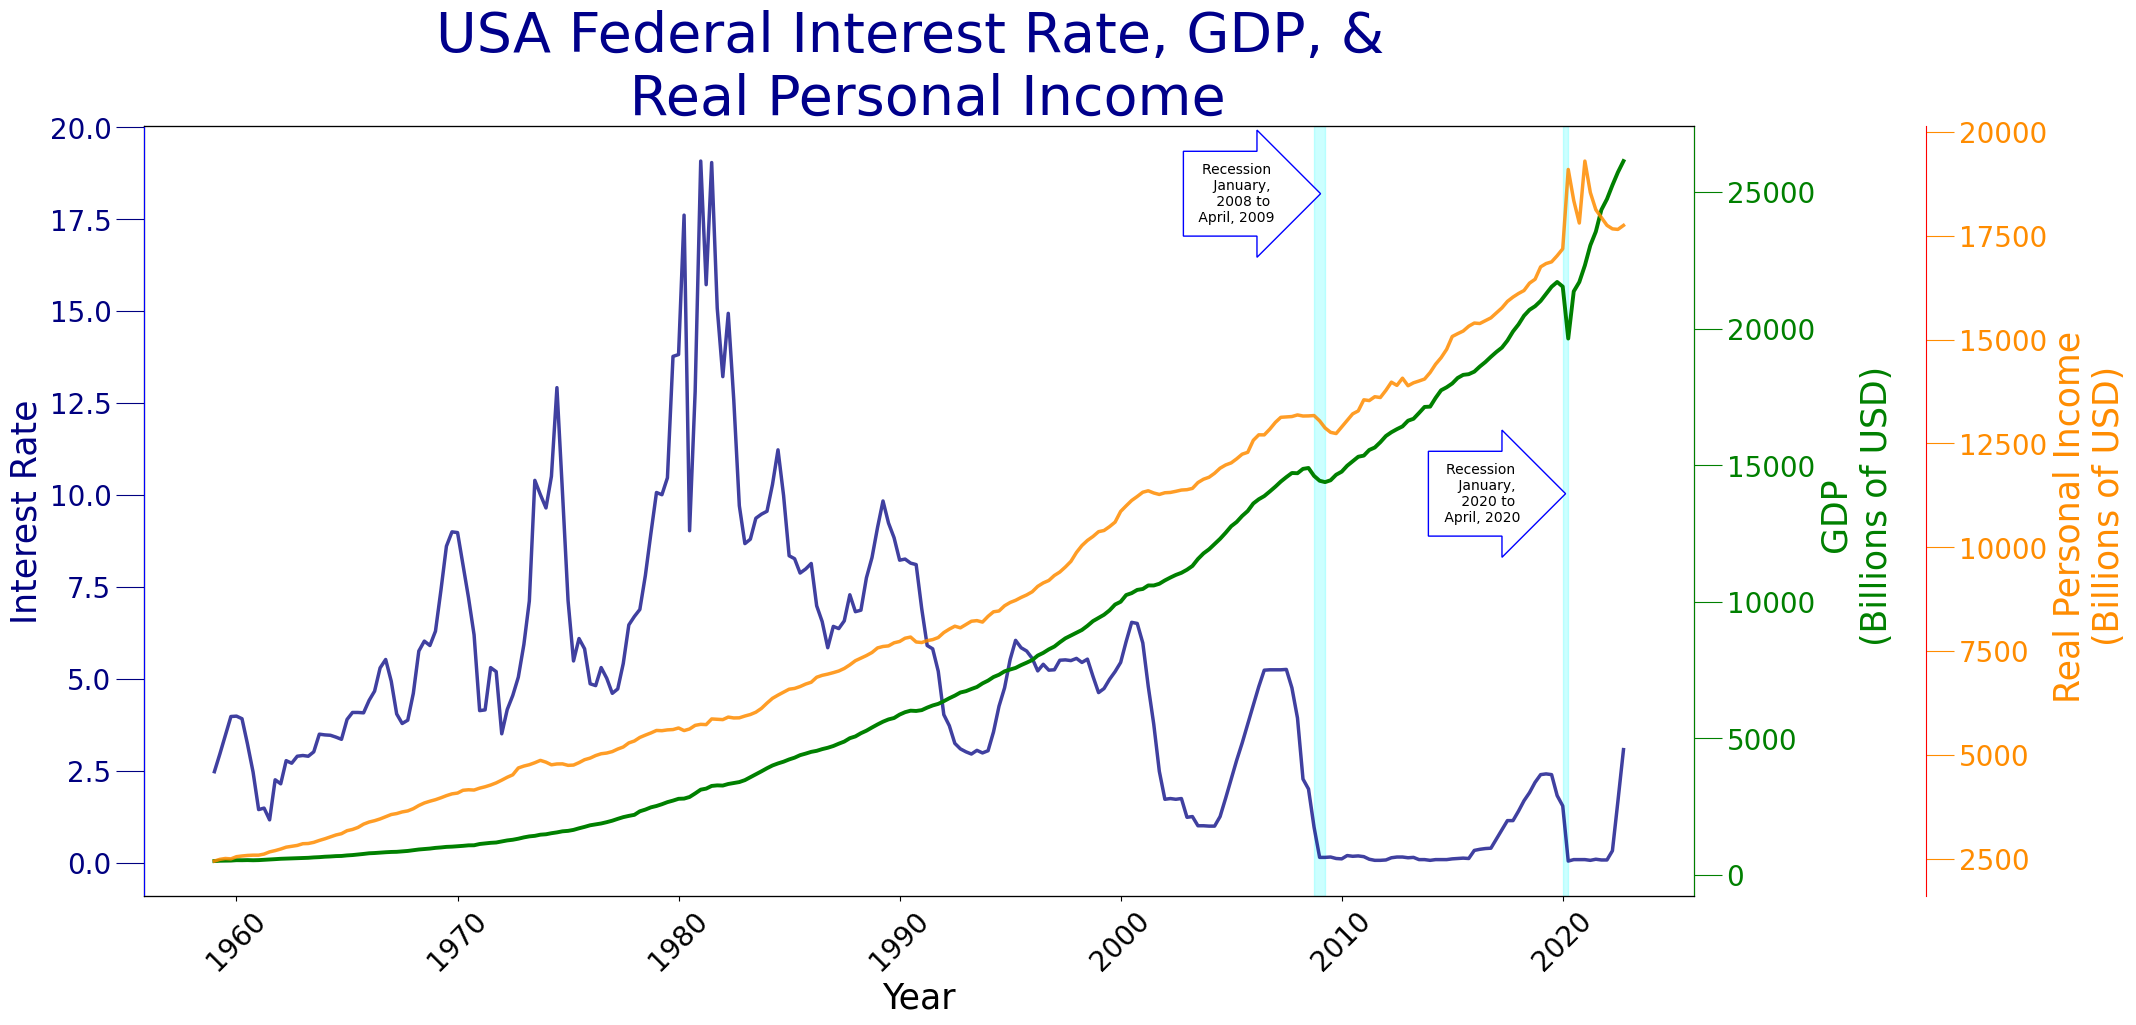

In [47]:
# Set code to default the size of chart, this code defaults for all charts run after this code!!!
plt.rcParams["figure.figsize"] = (20,10)

# Set parameters for subplots
fig, ax1 = plt.subplots()

# Set title of Plot
plt.title(label="USA Federal Interest Rate, GDP, & \n Real Personal Income",
          fontsize=40,
          color="darkblue")

# Define where the data comes from
x_axis = merged_gdp_rpi_int_rate_df['date']
int_rate_chart = merged_gdp_rpi_int_rate_df['Interest Rate']
gdp_chart = merged_gdp_rpi_int_rate_df['GDP']
rpi_chart = merged_gdp_rpi_int_rate_df['Real Personal Income']

# Define plot for interest rate
ax1.plot(x_axis, int_rate_chart, linewidth=2.5, alpha=0.75, color="navy")
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', color="black", labelsize=20, rotation = 45)


# Define plot for GDP
ax2 = ax1.twinx()
ax2.plot(x_axis, gdp_chart, linewidth=2.8, alpha=1, color="green", linestyle='-')
ax2.tick_params(axis='y', labelsize=20)

# Define plot for unemployment rate
ax3 = ax1.twinx()
ax3.plot(x_axis, rpi_chart, linewidth=2.5, alpha=.85, color="darkorange")
ax3.spines['right'].set_position(('axes',1.15))
ax3.tick_params(axis='y', labelsize=20)


# Set the labels for both axes
ax1.set_xlabel("Year", color="black", size=25)
ax1.set_ylabel("Interest Rate", color="navy", size=25)
ax2.set_ylabel("GDP \n (Billions of USD)",color="green", size = 25)
ax3.set_ylabel("Real Personal Income \n (Billions of USD)",color="darkorange", size = 25)

# Detail the tick marks
ax1.tick_params(axis='y',colors="navy", size=20)
ax2.tick_params(axis='y',colors="green", size=20)
ax3.tick_params(axis='y',colors="darkorange", size=20)


# Detail the color of the spines 
ax2.spines['right'].set_color("green")
ax3.spines['right'].set_color("red")
ax3.spines['left'].set_color("blue")

# Set the highlights for where recessions occurred
# ax1.axvspan(datetime(1957,10,1), datetime(1958,1,1), color="aqua", alpha=0.2)
ax1.axvspan(datetime(2008,10,1), datetime(2009,4,1), color="aqua", alpha=0.2)
ax1.axvspan(datetime(2020,1,1), datetime(2020,4,1), color="aqua", alpha=0.2)

bbox_props_1 = dict(boxstyle="rarrow,pad=.8", fc="white", ec="blue", lw=1)
ax1.annotate('Recession \n January, \n 2020 to \n April, 2020',
            xy=(1520, 500),
            xycoords='figure pixels',
            horizontalalignment='right',
            verticalalignment='bottom',
            bbox=bbox_props_1,
            size = 10)

bbox_props_2 = dict(boxstyle="rarrow,pad=.8", fc="white", ec="blue", lw=1)
ax1.annotate('Recession \n January, \n 2008 to \n April, 2009',
            xy=(1275, 800),
            xycoords='figure pixels',
            horizontalalignment='right',
            verticalalignment='bottom',
            bbox=bbox_props_2,
            size = 10)

# bbox_props_3 = dict(boxstyle="larrow,pad=.8", fc="white", ec="blue", lw=1)
# ax1.annotate('Recession \n October, 1957 \n to January, \n 1958',
#             xy=(375,800),
#             xycoords='figure pixels',
#             horizontalalignment='right',
#             verticalalignment='bottom',
#             bbox=bbox_props_3,
#             size = 10)


# save the figure as an .svg 
fig.savefig("three_charts_plot.png", bbox_inches='tight')

plt.show()

# <font color=blue, size = 5> Interest Rates Effect on Unemployment</font>

# <font color= blue, size = 5> Code Authored by Kenan White</font>

In [48]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'FEDFUNDS'
fred_key= fred_key

params = {"series_id": fred_series_id, "apiKey": fred_key}
query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"
fred_response = requests.get(query_url, params=params).json()



### Interest Rate Data Frame

In [49]:
int_rate_df = pd.DataFrame(fred_response["observations"])
# Reduce to pertinent columns
int_rate_df = int_rate_df[["date", "value"]]
# write a CSV
int_rate_df.to_csv("output_data/int_rate.csv")
int_rate_df


,date,value
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
818,2022-09-01,2.56
819,2022-10-01,3.08
820,2022-11-01,3.78
821,2022-12-01,4.10


In [50]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'UNRATE'
fred_key= fred_key
params = {"series_id": fred_series_id, "apiKey": fred_key}
query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"
fred_response = requests.get(query_url, params=params).json()

### Unemployment Rate Data Frame

In [51]:
unemp_df = pd.DataFrame(fred_response["observations"])
# Reduce to pertinent columns
unemp_df = unemp_df[["date", "value"]]
# write a CSV
unemp_df.to_csv("output_data/unemp.csv")
unemp_df

,date,value
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
896,2022-09-01,3.5
897,2022-10-01,3.7
898,2022-11-01,3.6
899,2022-12-01,3.5


### Merged - Int Rate and Unemp

In [52]:
merged_int_unemp_df = pd.merge(int_rate_df, unemp_df, on='date')
# Rename the columns
merged_int_unemp_df = merged_int_unemp_df.rename(columns={"value_x": "Interest Rate", "value_y": "Unemployment Rate"})
# write a CSV
merged_int_unemp_df.to_csv("output_data/merged_int_unemp.csv")
merged_int_unemp_df

,date,Interest Rate,Unemployment Rate
0,1954-07-01,0.80,5.8
1,1954-08-01,1.22,6.0
2,1954-09-01,1.07,6.1
3,1954-10-01,0.85,5.7
4,1954-11-01,0.83,5.3
...,...,...,...
818,2022-09-01,2.56,3.5
819,2022-10-01,3.08,3.7
820,2022-11-01,3.78,3.6
821,2022-12-01,4.10,3.5


In [53]:
#setting the index to be the date column and making sure that it is in a date format for use elsewhere. 
merged_int_unemp_df = merged_int_unemp_df.set_index('date')
merged_int_unemp_df.index = pd.to_datetime(merged_int_unemp_df.index).date

In [54]:
merged_int_unemp_df

,Interest Rate,Unemployment Rate
1954-07-01,0.80,5.8
1954-08-01,1.22,6.0
1954-09-01,1.07,6.1
1954-10-01,0.85,5.7
1954-11-01,0.83,5.3
...,...,...
2022-09-01,2.56,3.5
2022-10-01,3.08,3.7
2022-11-01,3.78,3.6
2022-12-01,4.10,3.5


In [55]:
#Changing columns from objects to numeric data
merged_int_unemp_df['Interest Rate'] = pd.to_numeric(merged_int_unemp_df['Interest Rate'])
merged_int_unemp_df['Unemployment Rate'] = pd.to_numeric(merged_int_unemp_df['Unemployment Rate'])

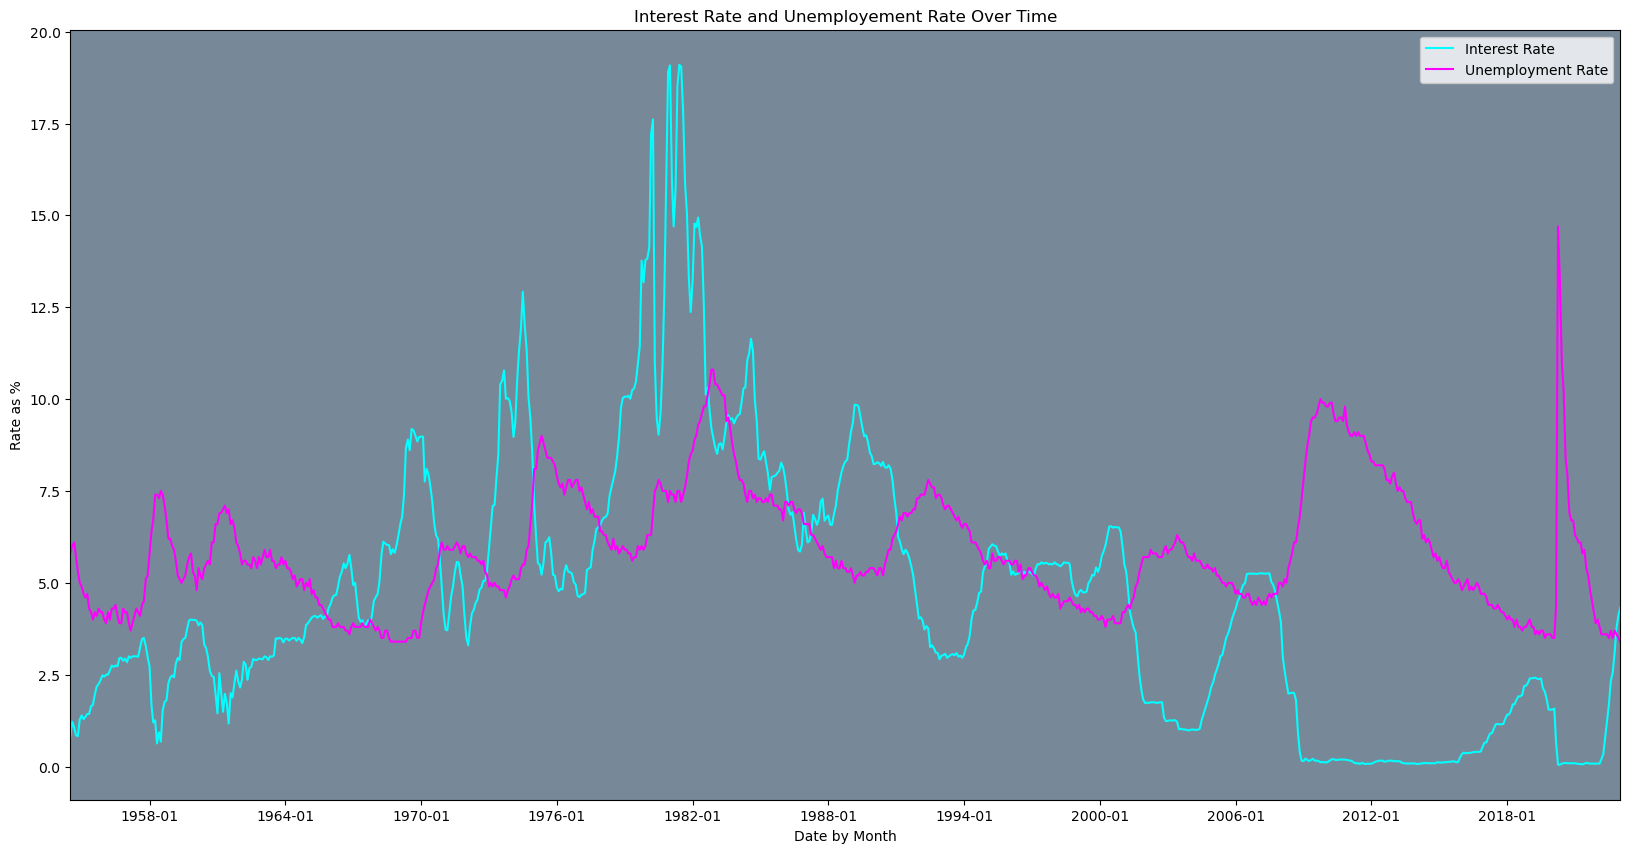

In [56]:
#Creating the first graph
graph1 = merged_int_unemp_df.plot(title="Interest Rate and Unemployement Rate Over Time", colormap='cool', figsize=(20,10))
graph1.set_xlabel("Date by Month")
graph1.set_ylabel("Rate as %")
graph1.set_facecolor("lightslategray")
graph1.xaxis.set_major_locator(mdates.MonthLocator(interval=72))
graph1.set_xlim([pd.Timestamp("1954-07-01"), pd.Timestamp("2023-01-01")])
graph1.get_figure().savefig('interest_vs_unemployment.svg')



In [57]:
# API Call for womens unemployment data
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'LNS14000002'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"
fred_response = requests.get(query_url, params=params).json()


In [58]:
wunemp_df = pd.DataFrame(fred_response["observations"])
# Reduce to pertinent columns
wunemp_df = wunemp_df[["date", "value"]]
# write a CSV
wunemp_df = wunemp_df.set_index("date")
wunemp_df= wunemp_df.rename(columns={"value":"Rate of Unemployment of Women"})
wunemp_df.to_csv("output_data/unemp.csv")
wunemp_df


,Rate of Unemployment of Women
date,
1948-01-01,3.3
1948-02-01,4.5
1948-03-01,4.4
1948-04-01,4.3
1948-05-01,3.7
...,...
2022-09-01,3.4
2022-10-01,3.7
2022-11-01,3.6


In [59]:
# API Call for mens unemployment data
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'LNS14000001'
fred_key= fred_key


params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"
fred_response = requests.get(query_url, params=params).json()

In [60]:
munemp_df = pd.DataFrame(fred_response["observations"])
# Reduce to pertinent columns
munemp_df = munemp_df[["date", "value"]]
# write a CSV
munemp_df = munemp_df.set_index("date")
munemp_df = munemp_df.rename(columns={"value":"Rate of Unemployment of Men"})
munemp_df.to_csv("output_data/unemp.csv")
munemp_df


,Rate of Unemployment of Men
date,
1948-01-01,3.4
1948-02-01,3.6
1948-03-01,3.8
1948-04-01,3.8
1948-05-01,3.5
...,...
2022-09-01,3.6
2022-10-01,3.7
2022-11-01,3.7


In [61]:
int_rate_df = int_rate_df.set_index("date")
int_rate_df = int_rate_df.rename(columns={"value":"Interest Rate"})

In [62]:
#Merging the three datasets together into one dataframe
mixedunemp_df = pd.merge(wunemp_df, munemp_df, left_index=True, right_index=True)
mixedunemp_df = pd.merge(mixedunemp_df, int_rate_df, left_index=True, right_index=True)
mixedunemp_df

,Rate of Unemployment of Women,Rate of Unemployment of Men,Interest Rate
date,,,
1954-07-01,6.3,5.6,0.80
1954-08-01,6.2,6,1.22
1954-09-01,6.4,6,1.07
1954-10-01,5.8,5.7,0.85
1954-11-01,5.6,5.2,0.83
...,...,...,...
2022-09-01,3.4,3.6,2.56
2022-10-01,3.7,3.7,3.08
2022-11-01,3.6,3.7,3.78


In [63]:
#Changing columns to be numeric
mixedunemp_df["Rate of Unemployment of Women"] = pd.to_numeric(mixedunemp_df["Rate of Unemployment of Women"])
mixedunemp_df["Rate of Unemployment of Men"]  = pd.to_numeric(mixedunemp_df["Rate of Unemployment of Men"])
mixedunemp_df["Interest Rate"] = pd.to_numeric(mixedunemp_df["Interest Rate"])
mixedunemp_df.index = pd.to_datetime(mixedunemp_df.index).date

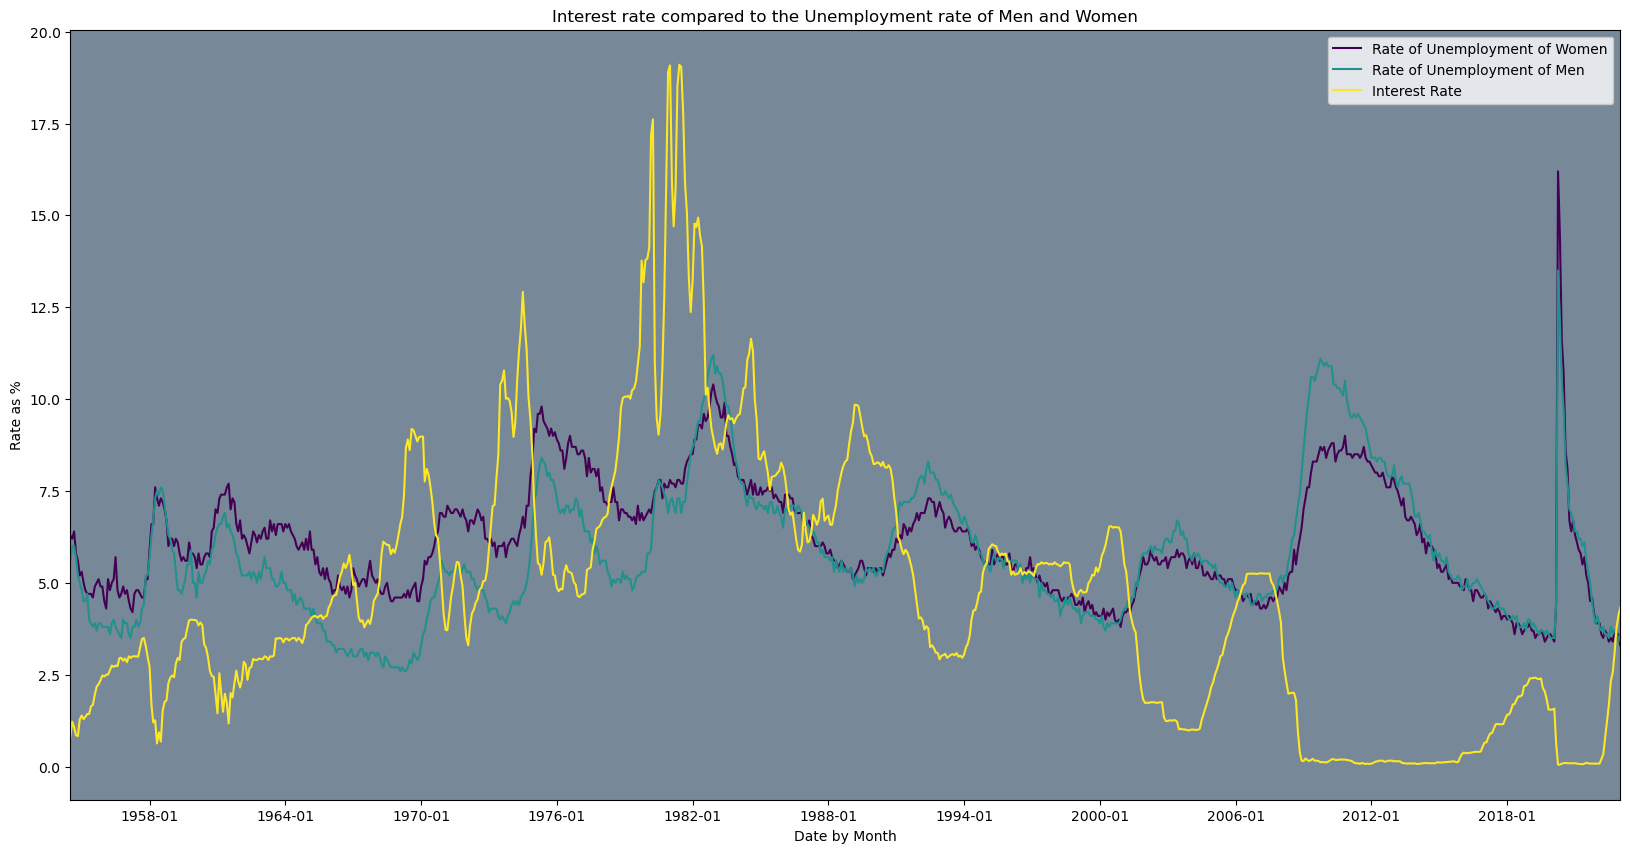

In [64]:
#creating the second graph
graph2 = mixedunemp_df.plot(title="Interest rate compared to the Unemployment rate of Men and Women", colormap='viridis', figsize=(20,10))
graph2.set_xlabel("Date by Month")
graph2.set_ylabel("Rate as %")
graph2.set_facecolor("lightslategray")
graph2.xaxis.set_major_locator(mdates.MonthLocator(interval=72))
graph2.set_xlim([pd.Timestamp("1954-07-01"), pd.Timestamp("2023-01-01")])
graph2.get_figure().savefig('interest_vs_men_vs_women.svg')

# <font color=blue, size = 5> Interest Rates Effect on the Global Economy</font>

# <font color= blue, size = 5> Code Authored by Riley Unverferth</font>

In [65]:
# API Call
fred_url = "https://api.stlouisfed.org/fred/series/observations?"
fred_series_id= 'FEDFUNDS'
fred_key= fred_key

params = {"series_id": fred_series_id, "apiKey": fred_key}

query_url = f"{fred_url}series_id={fred_series_id}&api_key={fred_key}&file_type=json"

fred_response = requests.get(query_url, params=params).json()

### Interest Rate Data Frame

In [66]:
int_rate_df = pd.DataFrame(fred_response["observations"])
# Reduce to pertinent columns
int_rate_df = int_rate_df[["date", "value"]]
int_rate_df

,date,value
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
818,2022-09-01,2.56
819,2022-10-01,3.08
820,2022-11-01,3.78
821,2022-12-01,4.10


In [67]:
# API Series ID's for China, Finland, Sudan
china_gdp_series_id = "MKTGDPCNA646NWDB"
fin_gdp_series_id = "MKTGDPFIA646NWDB"
sudan_gdp_series_id = "MKTGDPSDA646NWDB"

In [68]:
params_china = {"series_id": china_gdp_series_id, "apiKey": fred_key}
params_fin = {"series_id": fin_gdp_series_id, "apiKey": fred_key}
params_sudan = {"series_id": sudan_gdp_series_id, "apiKey": fred_key}

china_gdp_query = f"{fred_url}series_id={china_gdp_series_id}&api_key={fred_key}&file_type=json"
china_gdp_response = requests.get(china_gdp_query, params=params_china).json()
fin_gdp_query = f"{fred_url}series_id={fin_gdp_series_id}&api_key={fred_key}&file_type=json"
fin_gdp_response = requests.get(fin_gdp_query, params=params_fin).json()
sudan_gdp_query = f"{fred_url}series_id={sudan_gdp_series_id}&api_key={fred_key}&file_type=json"
sudan_gdp_response = requests.get(sudan_gdp_query, params=params_sudan).json()

In [69]:
china_gdp_df = pd.DataFrame(china_gdp_response["observations"])
china_gdp_df = china_gdp_df[["date", "value"]]
china_gdp_df.rename(columns={"value": "China GDP"})

,date,China GDP
0,1960-01-01,59716467625.3148
1,1961-01-01,50056868957.6732
2,1962-01-01,47209359005.6057
3,1963-01-01,50706799902.5104
4,1964-01-01,59708343488.5043
...,...,...
57,2017-01-01,12310409370892.8
58,2018-01-01,13894817549374.2
59,2019-01-01,14279937500606.5
60,2020-01-01,14687673892882.0


In [70]:
fin_gdp_df = pd.DataFrame(fin_gdp_response["observations"])
fin_gdp_df = fin_gdp_df[["date", "value"]]
fin_gdp_df.rename(columns={"value": "Finland GDP"})

,date,Finland GDP
0,1960-01-01,5224102195.52771
1,1961-01-01,5921659485.03284
2,1962-01-01,6340580854.39073
3,1963-01-01,6885920328.66187
4,1964-01-01,7766655085.78588
...,...,...
57,2017-01-01,255647979916.471
58,2018-01-01,275708001767.843
59,2019-01-01,268514916972.549
60,2020-01-01,271891788362.647


In [71]:
sudan_gdp_df = pd.DataFrame(sudan_gdp_response["observations"])
sudan_gdp_df = sudan_gdp_df[["date", "value"]]
sudan_gdp_df.rename(columns={"value": "Sudan GDP"})

,date,Sudan GDP
0,1960-01-01,1307333333.33333
1,1961-01-01,1419333333.33333
2,1962-01-01,1541666666.66667
3,1963-01-01,1568333333.33333
4,1964-01-01,1611333333.33333
...,...,...
57,2017-01-01,129717804934.614
58,2018-01-01,32333780383.2924
59,2019-01-01,32338079165.2893
60,2020-01-01,27034593750.0


In [72]:
merged_1_df = pd.merge(china_gdp_df, fin_gdp_df, on="date", how="inner")
merged_1_df.head()

,date,value_x,value_y
0,1960-01-01,59716467625.3148,5224102195.52771
1,1961-01-01,50056868957.6732,5921659485.03284
2,1962-01-01,47209359005.6057,6340580854.39073
3,1963-01-01,50706799902.5104,6885920328.66187
4,1964-01-01,59708343488.5043,7766655085.78588


In [73]:
merged_countries_df = pd.merge(merged_1_df, sudan_gdp_df, on="date", how="inner")
merged_countries_df = merged_countries_df.rename(columns={"value_x": "China GDP (MM)",
                                                         "value_y": "Finland GDP (MM)",
                                                         "value": "Sudan GDP (MM)"})
merged_countries_df["China GDP (MM)"] = pd.to_numeric(merged_countries_df["China GDP (MM)"],errors="coerce")
merged_countries_df["Finland GDP (MM)"] = pd.to_numeric(merged_countries_df["Finland GDP (MM)"],errors="coerce")
merged_countries_df["Sudan GDP (MM)"] = pd.to_numeric(merged_countries_df["Sudan GDP (MM)"],errors="coerce")

In [74]:
merged_countries_df

,date,China GDP (MM),Finland GDP (MM),Sudan GDP (MM)
0,1960-01-01,5.971647e+10,5.224102e+09,1.307333e+09
1,1961-01-01,5.005687e+10,5.921659e+09,1.419333e+09
2,1962-01-01,4.720936e+10,6.340581e+09,1.541667e+09
3,1963-01-01,5.070680e+10,6.885920e+09,1.568333e+09
4,1964-01-01,5.970834e+10,7.766655e+09,1.611333e+09
...,...,...,...,...
57,2017-01-01,1.231041e+13,2.556480e+11,1.297178e+11
58,2018-01-01,1.389482e+13,2.757080e+11,3.233378e+10
59,2019-01-01,1.427994e+13,2.685149e+11,3.233808e+10
60,2020-01-01,1.468767e+13,2.718918e+11,2.703459e+10


In [75]:
merged_countries_df["China GDP (MM)"] = round(merged_countries_df["China GDP (MM)"]/1000000,2)
merged_countries_df["Finland GDP (MM)"] = round(merged_countries_df["Finland GDP (MM)"] / 1000000,2)
merged_countries_df["Sudan GDP (MM)"] = round(merged_countries_df["Sudan GDP (MM)"] / 1000000,2)
merged_countries_df.head()

,date,China GDP (MM),Finland GDP (MM),Sudan GDP (MM)
0,1960-01-01,59716.47,5224.10,1307.33
1,1961-01-01,50056.87,5921.66,1419.33
2,1962-01-01,47209.36,6340.58,1541.67
3,1963-01-01,50706.80,6885.92,1568.33
4,1964-01-01,59708.34,7766.66,1611.33


In [76]:
countries_int = pd.merge(merged_countries_df,int_rate_df,on="date",how="left")
countries_int = countries_int.rename(columns={"value": "Interest Rate"})
countries_int

,date,China GDP (MM),Finland GDP (MM),Sudan GDP (MM),Interest Rate
0,1960-01-01,59716.47,5224.10,1307.33,3.99
1,1961-01-01,50056.87,5921.66,1419.33,1.45
2,1962-01-01,47209.36,6340.58,1541.67,2.15
3,1963-01-01,50706.80,6885.92,1568.33,2.92
4,1964-01-01,59708.34,7766.66,1611.33,3.48
...,...,...,...,...,...
57,2017-01-01,12310409.37,255647.98,129717.80,0.65
58,2018-01-01,13894817.55,275708.00,32333.78,1.41
59,2019-01-01,14279937.50,268514.92,32338.08,2.40
60,2020-01-01,14687673.89,271891.79,27034.59,1.55


In [77]:
countries_int["date"] = pd.to_datetime(countries_int["date"])
countries_int["Interest Rate"] = pd.to_numeric(countries_int["Interest Rate"], errors="coerce")
countries_int.to_csv("output_data/china_fin_sudan.csv")
countries_int

,date,China GDP (MM),Finland GDP (MM),Sudan GDP (MM),Interest Rate
0,1960-01-01,59716.47,5224.10,1307.33,3.99
1,1961-01-01,50056.87,5921.66,1419.33,1.45
2,1962-01-01,47209.36,6340.58,1541.67,2.15
3,1963-01-01,50706.80,6885.92,1568.33,2.92
4,1964-01-01,59708.34,7766.66,1611.33,3.48
...,...,...,...,...,...
57,2017-01-01,12310409.37,255647.98,129717.80,0.65
58,2018-01-01,13894817.55,275708.00,32333.78,1.41
59,2019-01-01,14279937.50,268514.92,32338.08,2.40
60,2020-01-01,14687673.89,271891.79,27034.59,1.55


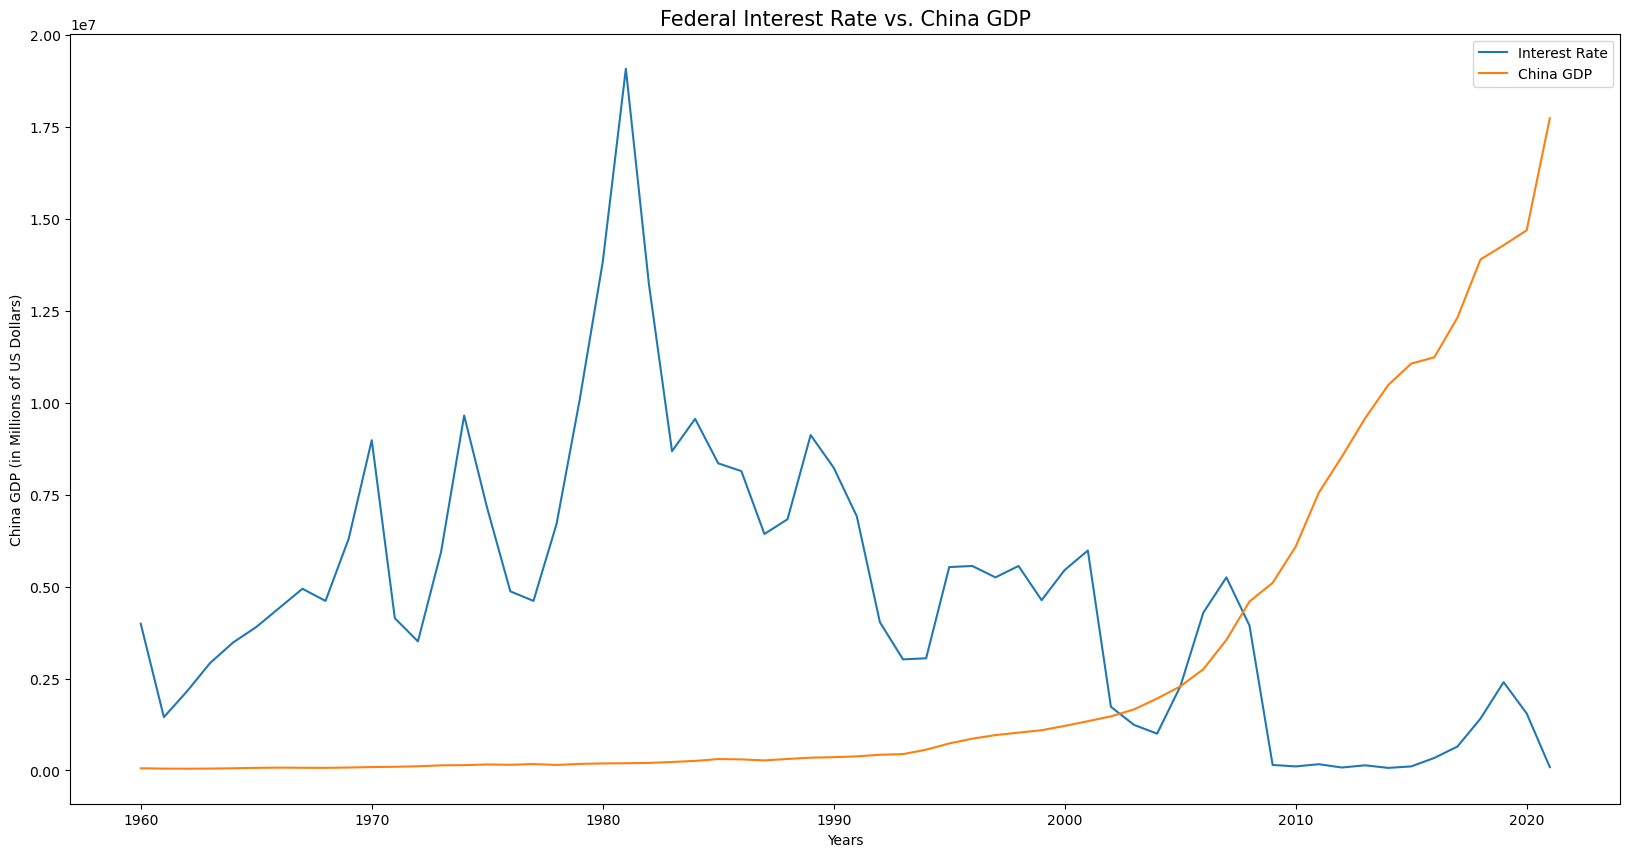

In [78]:
plt.plot(countries_int["date"],(countries_int["Interest Rate"]*1000000),label="Interest Rate")
plt.plot(countries_int["date"],countries_int["China GDP (MM)"],label="China GDP")
plt.title("Federal Interest Rate vs. China GDP",fontsize=15)
plt.xlabel("Years")
plt.ylabel("China GDP (in Millions of US Dollars)")
plt.legend()
plt.savefig('output_data/int_vs_china_gdp_line.svg')
plt.show()

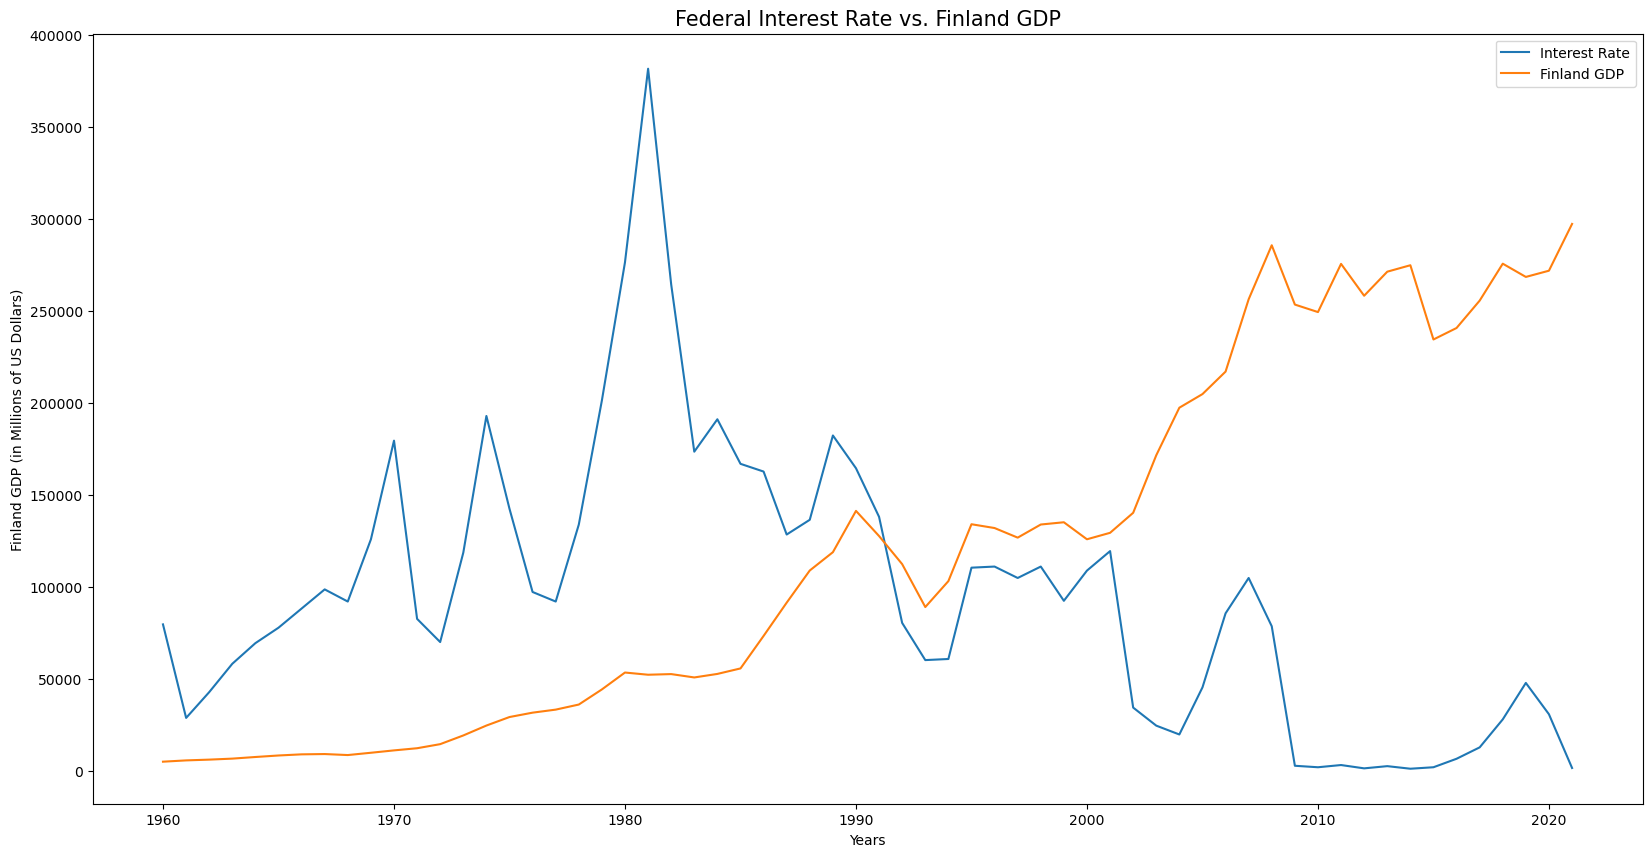

In [79]:
plt.plot(countries_int["date"],(countries_int["Interest Rate"]*20000),label="Interest Rate")
plt.plot(countries_int["date"],countries_int["Finland GDP (MM)"],label="Finland GDP")
plt.title("Federal Interest Rate vs. Finland GDP",fontsize=15)
plt.xlabel("Years")
plt.ylabel("Finland GDP (in Millions of US Dollars)")
plt.legend()
plt.savefig('output_data/int_vs_fin_gdp_line.svg')
plt.show()

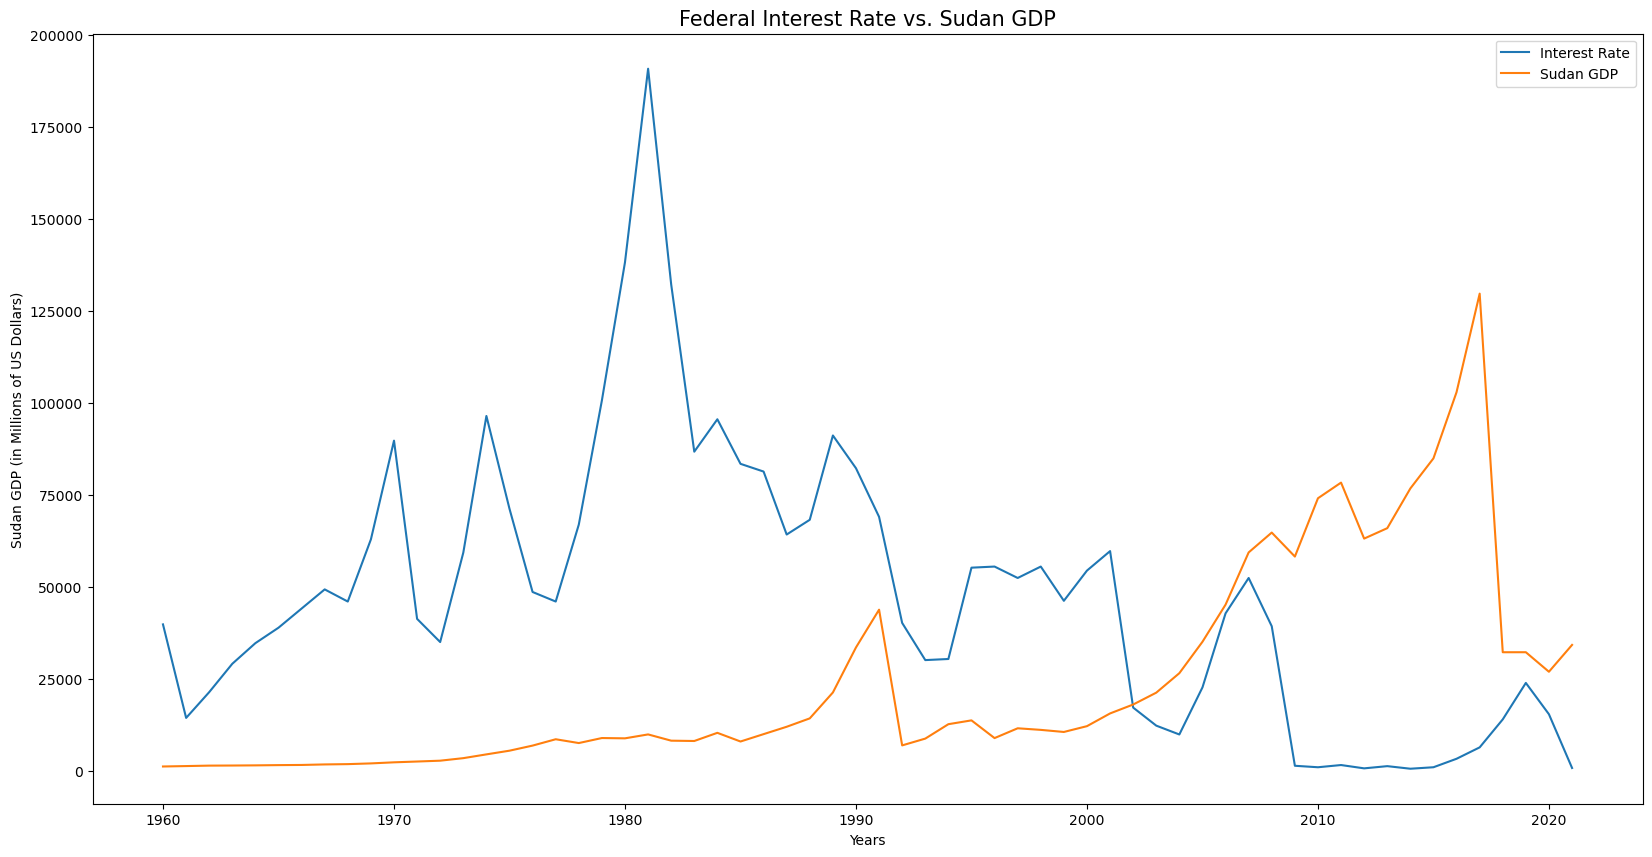

In [80]:
plt.plot(countries_int["date"],(countries_int["Interest Rate"]*10000),label="Interest Rate")
plt.plot(countries_int["date"],countries_int["Sudan GDP (MM)"],label="Sudan GDP")
plt.title("Federal Interest Rate vs. Sudan GDP",fontsize=15)
plt.xlabel("Years")
plt.ylabel("Sudan GDP (in Millions of US Dollars)")
plt.legend()
plt.savefig('output_data/int_vs_sudan_gdp_line.svg')
plt.show()

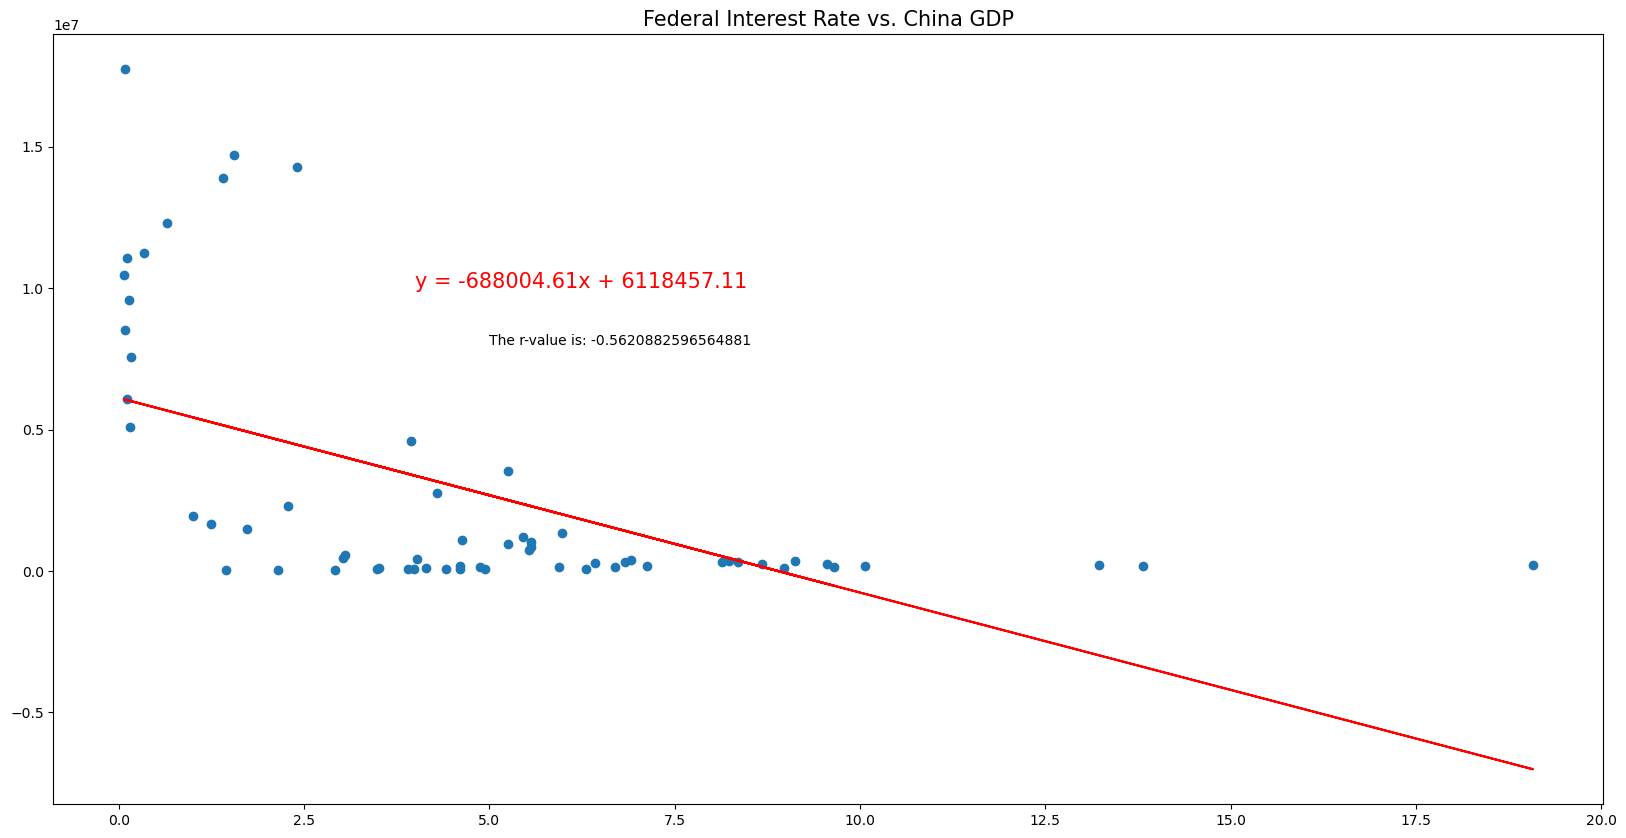

In [81]:
plt.scatter(countries_int["Interest Rate"], countries_int["China GDP (MM)"],marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(countries_int["Interest Rate"],countries_int["China GDP (MM)"])
regress_values = countries_int["Interest Rate"] * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(countries_int["Interest Rate"],regress_values,"r-")
plt.annotate(line_eq,(4,10000000),fontsize=15,color="red")
text =(f"The r-value is: {rvalue}")
plt.text(5,8000000,text)
plt.title("Federal Interest Rate vs. China GDP",fontsize=15)
plt.savefig('output_data/int_vs_china_gdp_plot.svg')
plt.show()

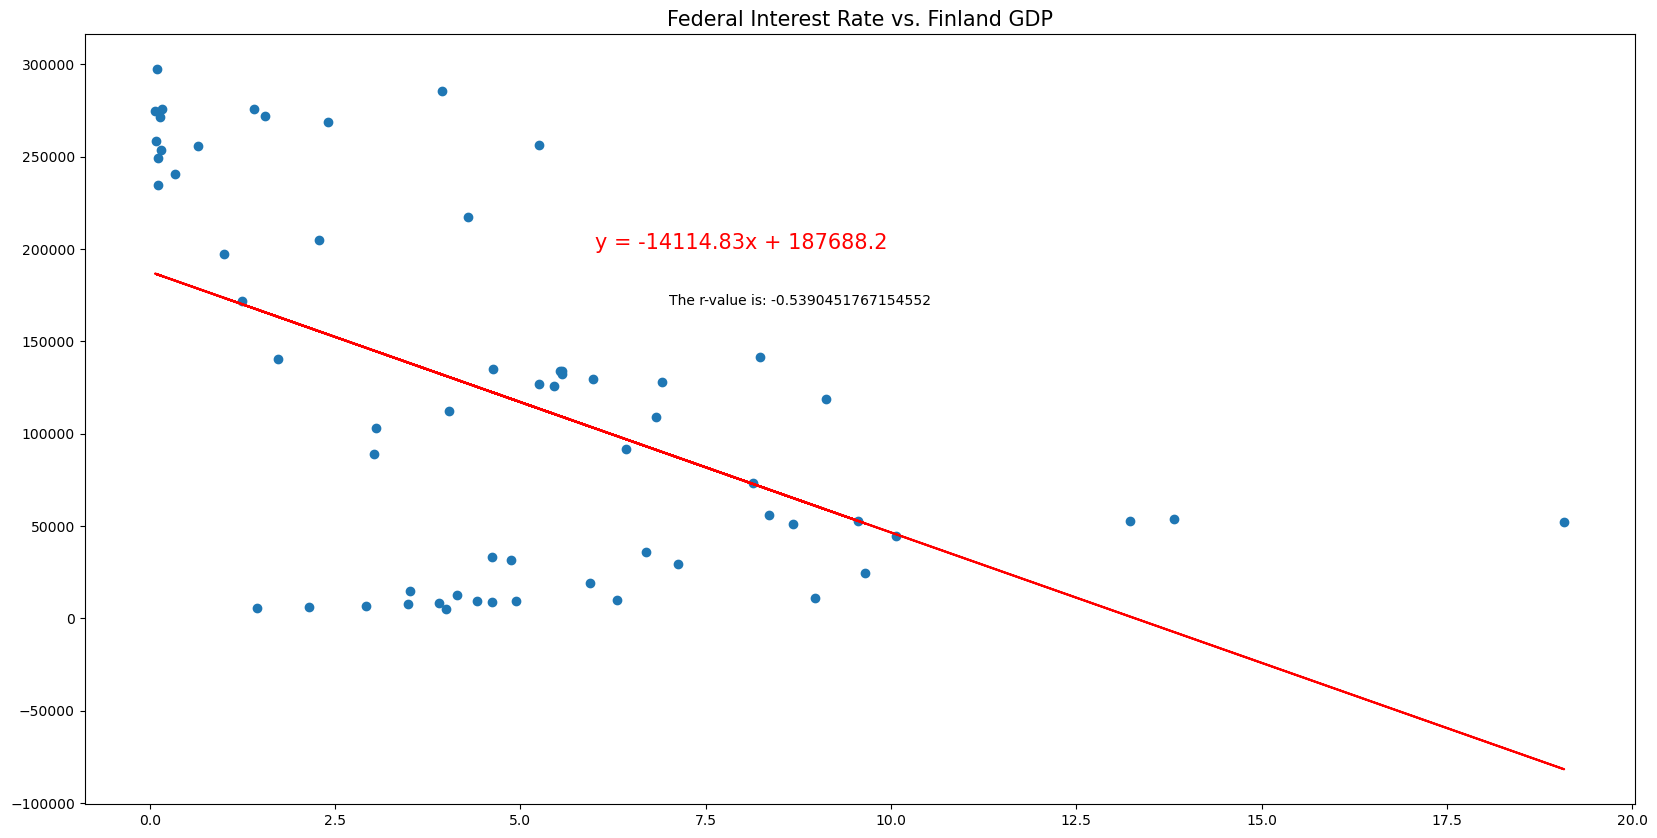

In [82]:
plt.scatter(countries_int["Interest Rate"], countries_int["Finland GDP (MM)"],marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(countries_int["Interest Rate"],countries_int["Finland GDP (MM)"])
regress_values = countries_int["Interest Rate"] * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(countries_int["Interest Rate"],regress_values,"r-")
plt.annotate(line_eq,(6,200000),fontsize=15,color="red")
text = (f"The r-value is: {rvalue}")
plt.text(7,170000,text)
plt.title("Federal Interest Rate vs. Finland GDP",fontsize=15)
plt.savefig('output_data/int_vs_fin_gdp_plot.svg')
plt.show()

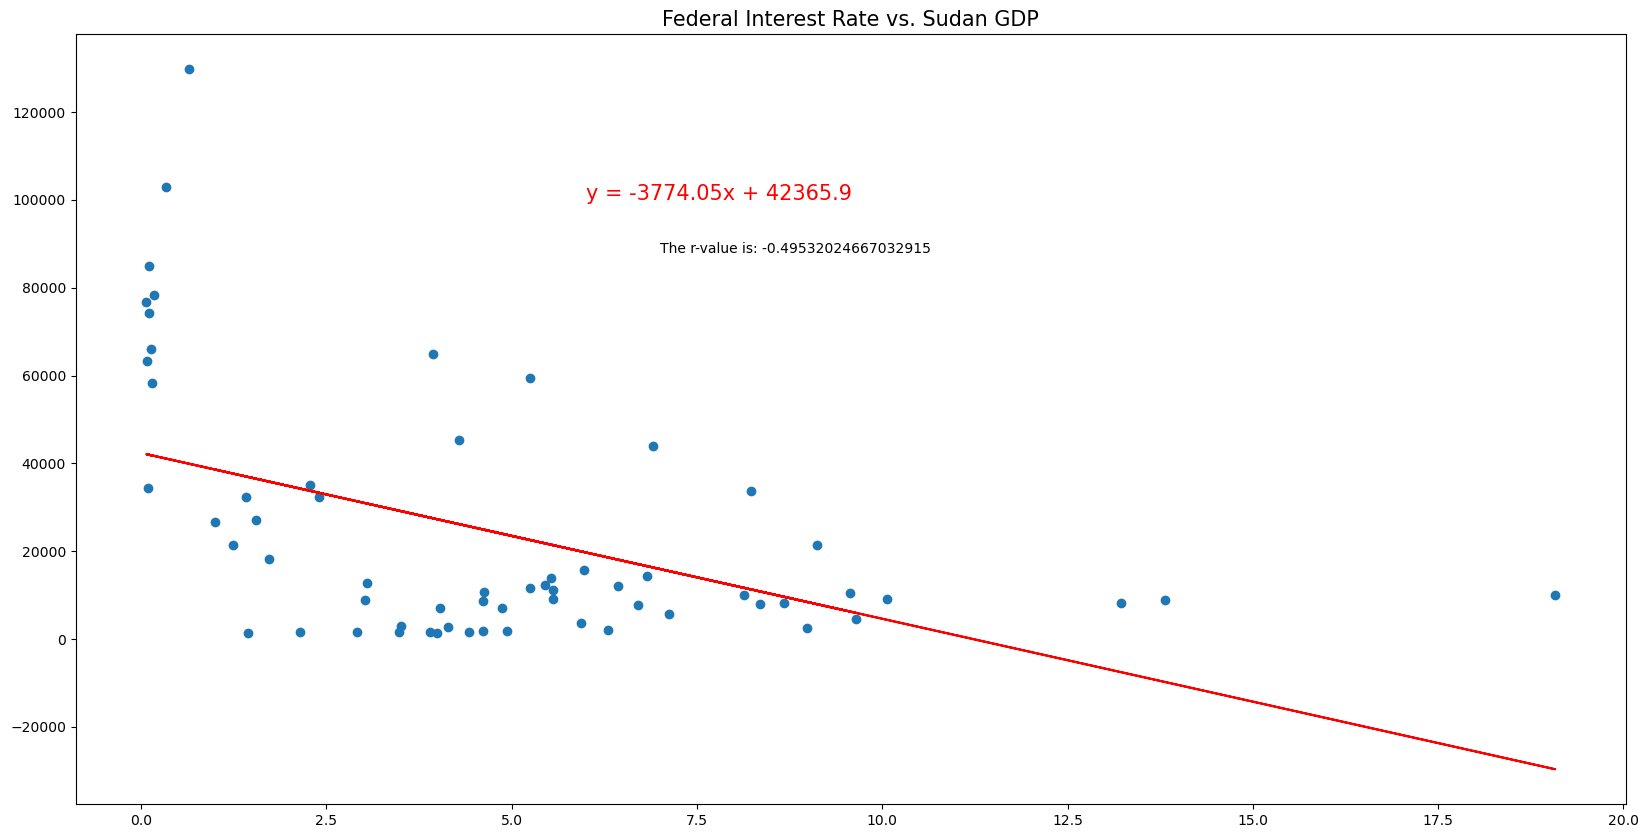

In [83]:
plt.scatter(countries_int["Interest Rate"], countries_int["Sudan GDP (MM)"],marker="o")
(slope, intercept, rvalue, pvalue, stderr) = linregress(countries_int["Interest Rate"],countries_int["Sudan GDP (MM)"])
regress_values = countries_int["Interest Rate"] * slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(countries_int["Interest Rate"],regress_values,"r-")
plt.annotate(line_eq,(6,100000),fontsize=15,color="red")
text = (f"The r-value is: {rvalue}")
plt.text(7,88000,text)
plt.title("Federal Interest Rate vs. Sudan GDP",fontsize=15)
plt.savefig('output_data/int_vs_sudan_gdp_plot.svg')
plt.show()

**<u><font color=black, size = 500> End of The Most </font></u>**
**<u><font color=forestgreen, size = 500>I</font>**</u>
**<u><font color=forestgreen, size = 500>n</font>**</u>
**<u><font color=forestgreen, size = 500>t</font>**</u>
**<u><font color=forestgreen, size = 500>e</font>**</u>
**<u><font color=forestgreen, size = 500>r</font>**</u>
**<u><font color=forestgreen, size = 500>e</font>**</u>
**<u><font color=forestgreen, size = 500>s</font>**</u>
**<u><font color=forestgreen, size = 500>t</font>**</u>
**<u><font color=black, size = 500>ing Code </font>**</u>





